# **Índice**

- [Visão Geral do Projeto](#geral)
- [Sobre este projeto e bibliotecas utilizadas](#sobre)
- [Parte 01 - Descrição do conjunto de dados:](#parte01)
    - [O dataset 'Heart Disease'](#heart)
    - [Importando as Bibliotecas necessárias](#importando)
    - [Dicionário](#dicionario)
    - [Descrição dos Dados](#descrição)
    - [Análise Descritiva do Dataset](#estatisticas)
    - [Visualizando as variáveis categóricas no dataset](#visucat)
    - [Perguntas de partida e hipóteses](#perguntas)
    - [Recapitulação](#recap01)    
- [Parte 02 - Análise da variáveis através das perguntas apresentadas:](#parte02)
    - [Qual a distribuição de idade dos pacientes?](#idade)
    - [Existe diferença na prevalência de doença cardíaca entre homens e mulheres?](#homem/mulher)
    - [Qual o tipo de dor no peito mais frequente em pacientes com doença cardíaca?](#tipodedor)
    - [Qual a relação entre o nível de colesterol e a presença de doença cardíaca?](#colesterol)
    - [A Angina induzida por exercício é um fator de risco para doença cardíaca?](#angina)
    - [Qual a influência da depressão do segmento ST (oldpeak) na probabilidade de doença cardíaca?](#dpst)
    - [Qual a Relação entre Frequência Cardíaca e Idade?](#freqeidade)
    - [Recapitiulação](#recap02)
- [Parte 03 - Insights e Conclusões](#parte03)
    - [Insights](#insights)
    - [Conclusão](#conclusao)
- [Referências](#referências)

<a id="geral"></a>
## **Visão Geral do Projeto:**

Este projeto de análise de dados explora o conjunto de dados de doenças cardíacas e é dividido em três partes: 
1. [Descrição do conjunto de dados através de estatísticas e gráficos.](#parte01)
2. [Investigação das relações entre todas as variáveis do conjunto de dados.](#parte02)
3. [Insights e Conclusões.](#parte3)
---

<a id="sobre"></a>
### **Sobre este Projeto e Bibliotecas Utilizadas:**

Este projeto foi desenvolvido através do `Jupyter Notebook` usando as bibliotecas `matplotlib`, `numpy`, `pandas`, `seaborn` e `IPython`.

---


<a id="importando"></a>
### **Importando as Bibliotecas Necessárias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, Image, HTML


warnings.filterwarnings("ignore")
np.set_printoptions(precision=4, threshold=5, suppress=True)
pd.options.display.max_rows=8

<a id="parte01"></a>
# **1. Descrição do conjunto de dados através de estatísticas e gráficos**

A primeira parte do projeto tem como objetivo iniciar a análise exploratória de dados, fornecendo um resumo das principais características do conjunto de dados usando estatísticas e gráficos. 

In [2]:
caminho_imagem = '../references/coracao.png'
html_code = f'''
<div style="text-align: center;">
    <img src="{caminho_imagem}" alt="Imagem centralizada">
</div>
'''
display(HTML(html_code))


<a id="heart"></a>
### **O Data set 'Heart Disease'**

O dataset "Heart Disease", disponível no [Kaggle]('https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset') reúne informações sobre pacientes com e sem doenças cardíacas. Ele contém 14 atributos que descrevem características como `idade`, `sexo`, `tipo de dor no peito`, resultados de exames (`pressão arterial`, `colesterol`, `eletrocardiograma`, etc.) e histórico médico (`diabetes`, `angina induzida por exercício`). O objetivo principal do conjunto de dados é prever a presença de doença cardíaca em um paciente com base nessas características.

---

## **Leitura do Conjunto de Dados**

In [3]:
df = pd.read_csv("../data/raw/heart_statlog_cleveland_hungary_final.csv")
print('Primeiras 5 linhas:\n')
display(df.head())
print("\nÚltimas 5 linhas:\n")
display(df.tail())
print("\nNúmero total de Linhas e Colunas:")
display(df.shape)

Primeiras 5 linhas:



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



Últimas 5 linhas:



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0



Número total de Linhas e Colunas:


(1190, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### **Pequeno Dicionário de Termos Médicos**

O dicionário a seguir fornece explicações sucintas para alguns dos termos médicos presentes no conjunto de dados:

* `Açúcar no sangue em jejum`: Indica se o nível de açúcar no sangue do paciente em jejum é superior a 120 mg/dL, o que pode indicar diabetes.
* `Angina`: Angina é uma dor no peito causada pela falta de oxigênio no músculo cardíaco, geralmente devido ao estreitamento das artérias coronárias.
* `Colesterol`: Colesterol é um tipo de gordura essencial para o funcionamento do corpo, mas seu excesso no sangue pode aumentar o risco de doenças cardíacas.
* `Depressão do segmento ST`: Uma medida de quanto o segmento ST do eletrocardiograma do paciente é desviado para baixo durante o exercício, em comparação com o repouso.
* `ECG em repouso`: Resultados de um eletrocardiograma realizado enquanto o paciente estava em repouso.
* `Frequência cardíaca máxima`: A frequência cardíaca mais alta atingida pelo paciente.
* `Inclinação do segmento ST`: A direção da inclinação do segmento ST no eletrocardiograma do paciente durante o pico do exercício.
* `Pressão arterial em repouso`: A pressão arterial do paciente quando em repouso, medida em milímetros de mercúrio (mmHg).
* `Segmento ST`: O segmento ST é uma parte do eletrocardiograma que reflete a atividade elétrica do coração entre o fim da contração e o início do relaxamento dos ventrículos, sendo útil para identificar possíveis problemas cardíacos.
* `Tipo de dor no peito`: A natureza da dor no peito sentida pelo paciente (por exemplo, angina típica, angina atípica).








<a id="dicionario"></a>
### **Dicionário de Dados**

In [5]:
pd.set_option('display.max_rows', None)
dicionario = pd.read_csv("../data/external/dictionary.csv")
display(HTML(dicionario.to_html(index=False)))

variavel,descricao,tipo,subtipo
age,Idade do paciente em anos.,quantitativa,contínua
sex,"Sexo do paciente (1 = Masculino, 0 = Feminino).",qualitativa,nominal
chest pain type,"Tipo de dor no peito (1: Angina típica, 2: Angina atípica, 3: Dor não anginosa, 4: Assintomático).",qualitativa,ordinal
resting bp s,Pressão arterial em repouso (em mm Hg).,quantitativa,contínua
cholesterol,Colesterol sérico em mg/dl.,quantitativa,contínua
fasting blood sugar,Açúcar no sangue em jejum > 120 mg/dl (1 = Verdadeiro; 0 = Falso).,qualitativa,nominal
resting ecg,"Resultados do eletrocardiograma em repouso (0: Normal, 1: Anormalidade da onda ST-T, 2: Hipertrofia ventricular esquerda).",qualitativa,ordinal
max heart rate,Frequência cardíaca máxima alcançada.,quantitativa,contínua
exercise angina,"Angina induzida por exercício (1 = Sim, 0 = Não).",qualitativa,nominal
oldpeak,Depressão do segmento ST induzida por exercício em relação ao repouso.,quantitativa,contínua


<a id="descrição"></a> 
### **Descrição aprofundada dos Dados**

O conjunto de dados contém 11 atributos que descrevem diferentes características de pacientes o objetivo é prever se o paciente tem ou não doença cardíaca. Abaixo está uma descrição detalhada de cada atributo:


* `age`: Idade do paciente em anos.

* `sex`: Sexo do paciente:
    * 0 = Feminino
    * 1 = Masculino
    
* `Chest Pain Type`: Tipo de dor no peito:
    * 1 = Angina típica: dor no peito relacionada à diminuição do suprimento de sangue para o coração
    * 2 = Angina atípica: dor no peito não relacionada ao coração
    * 3 = Dor não anginosa: tipicamente espasmos esofágicos (não relacionados ao coração)
    * 4 = Assintomática: dor no peito sem sinais de doença 
    
* `Resting BP S`: Pressão arterial em repouso (em mmHg na admissão ao hospital).

* `Cholesterol`: Colesterol sérico em mg/dL (colesterol sérico = LDL + HDL + 0.2 * triglicerídeos).
    - Valores acima de 200 são motivo de preocupação.
    
* `Fasting Blood Sugar`: Açúcar no sangue em jejum > 120 mg/dL:
    * 0 = Falso
    * 1 = Verdadeiro
    * Valores acima de 126 mg/dL indicam diabetes.
    
* `Resting ECG`: Resultados do eletrocardiograma em repouso:
    * 0 = Normal
    * 1 = Anormalidade da onda ST-T: pode variar de sintomas leves a problemas graves, sinaliza batimento cardíaco não normal
    * 2 = Possível ou definida hipertrofia ventricular esquerda: aumento da principal câmara de bombeamento do coração
    
* `Max Heart Rate`: Frequência cardíaca máxima alcançada.

* `Exercise Angina`: Angina induzida por exercício:
    * 0 = Não
    * 1 = Sim
    
* `Oldpeak`: Depressão do segmento ST induzida por exercício em relação ao repouso (observa o estresse do coração durante o exercício).
    * Um coração doente se estressará mais.   
    
* `ST slope`: Inclinação do segmento ST no pico do exercício:
    * 0 = Inclinada para cima: melhor frequência cardíaca com exercício (incomum)
    * 1 = Plano: alteração mínima (coração saudável típico)
    * 2 = Inclinada para baixo: sinais de coração doente

* `Target`: Presença ou ausência de doença cardíaca:
    * 0 = Não
    * 1 = Sim

### **Checando os tipos dos dados**

In [6]:
df.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [7]:
df.dtypes


age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

### **Convertendo Variáveis Qualitativas para o tipo `Category`:**

In [8]:
colunas_categoricas = ['sex', 'chest pain type', 
                       'fasting blood sugar', 'resting ecg', 
                       'exercise angina', 'ST slope', 'target']

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype('category')
    
print(*df.dtypes)


int64 category category int64 int64 category category int64 category float64 category category


### **Verificando se existem valores ausentes ou NaN**

Será verificado se existem `valores ausentes` ou `NaN` no conjunto de dados usando a função `isnull()` e a soma desses valores se obterá uma contagem dos valores ausentes, que neste caso é zero.

In [9]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### **Modificando nomes dos dados para melhor entendimento e visualização**

In [10]:
df['target'] = df.target.replace({1: "Cardíaco", 
                                  0: "Não Cardíaco"})

df['sex'] = df.sex.replace({1: "Masculino", 
                            0: "Feminino"})

df['chest pain type'] = df['chest pain type'].replace({1: "angina típica", 
                                                       2: "Angina Atípica", 
                                                       3: "Dor Não Anginosa",
                                                       4: "Assintomático"})

df['resting ecg'] = df['resting ecg'].replace({0: "Normal", 
                                               1: "Anormalidade da onda ST-T", 
                                               2: "Possível ou definida hipertrofia ventricular esquerda"})

df['exercise angina'] = df['exercise angina'].replace({0: 'Não', 
                                                       1: 'Sim'})

df['fasting blood sugar'] = df['fasting blood sugar'].replace({0: 'Não', 
                                                               1: 'Sim'})

df['ST slope'] = df['ST slope'].replace({1: 'Cima', 
                                         2: 'Plano', 
                                         3: 'Baixo'})



<a id="estatisticas"></a>
## **Análise Descritiva do Dataset**

Serão calculadas algumas estatísticas descritivas para entender melhor a distribuição dos dados. Posteriormente serão feitas visualizações das distribuições.

### **Tabela de Característica das Variáveis Qualitativas**

In [11]:
df.describe(include=['category'])

,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope,target
count,1190,1190,1190,1190,1190,1190,1190
unique,2,4,2,3,2,4,2
top,Masculino,Assintomático,Não,Normal,Não,Plano,Cardíaco
freq,909,625,936,684,729,582,629


### **Resumo das Variáveis Qualitativas**

* `Sex`: Existem 909 pacientes do sexo masculino.

* `Chest Pain Type`: A maioria apresenta Dor Não Anginosa, representando 625 do total de pacientes.

* `Fasting Blood Sugar`: A maioria dos pacientes contém os valores normais de açucar no sangue em jejum, totalizando 936 pacientes.

* `Resting ECG`: Um pouco mais da metade dos pacientes apresenta um ECG normal em repouso, totalaizando 684 pacientes.

* `Exercise Angina`: A maioria não apresenta angina induzida por exercícios, totalizando 729 pacientes.

* `ST Slope`: A maioria apresenta uma Segmento ST Plano, totalizando 582 pacientes.

* `Target`: Um pouco mais da metade dos pacientes apresenta doença cardíaca, totalizando 629 pacientes.

### **Tabela de Característica das Variáveis Quantitativas**

In [12]:
df.describe()

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


A tabela gerada acima mostra o resumo das estatísticas para as variáveis `age`, `resting bp s`, `cholesterol`, `max heart rate` e `oldpeak`. Elas fornecem informações sobre **média, mediana, desvio padrão e etc**.

In [13]:
print(f"A média da idade é de {df['age'].mean():.0f} anos.")
print(f"A média da Pressão Arterial em repouso é de {df['resting bp s'].mean():.2f}.")
print(f"A média dos níveis de Colesterol é de {df['cholesterol'].mean():.2f}.")
print(f"A média da frequência cardíaca máxima é de {df['max heart rate'].mean():.2f}.")
print(f"A média da depressão do Segmento ST induzida por exercícios é de {df['oldpeak'].mean():.2f}.")

A média da idade é de 54 anos.
A média da Pressão Arterial em repouso é de 132.15.
A média dos níveis de Colesterol é de 210.36.
A média da frequência cardíaca máxima é de 139.73.
A média da depressão do Segmento ST induzida por exercícios é de 0.92.


### Variância e Desvio Padrão

In [14]:
print(f"A variância e os desvios padrão da idade é {df['age'].var():.2f} e {df['age'].std():.2f}.")
print(f"A variância e os desvios padrão da pressão arterial é {df['resting bp s'].var():.2f} e {df['resting bp s'].std():.2f}.")
print(f"A variância e os desvios padrão do colesterol é de {df['cholesterol'].var():.2f} e {df['cholesterol'].std():.2f}.")
print(f"A variância e os desvios padrão da frequência cardíaca máxima é de {df['max heart rate'].var():.2f} e {df['max heart rate'].std():.2f}.")
print(f"A variância e os desvios padrão da depressão do segmento ST é de {df['oldpeak'].var():.2f} e {df['oldpeak'].std():.2f}.")

A variância e os desvios padrão da idade é 87.58 e 9.36.
A variância e os desvios padrão da pressão arterial é 337.41 e 18.37.
A variância e os desvios padrão do colesterol é de 10286.12 e 101.42.
A variância e os desvios padrão da frequência cardíaca máxima é de 651.15 e 25.52.
A variância e os desvios padrão da depressão do segmento ST é de 1.18 e 1.09.


### Amplitude dos Dados:

In [15]:
print(f"O paciente mais novo tem {df['age'].min()} anos enquanto o mais velho tem {df['age'].max()} anos, gerando uma variação de {df['age'].max() - df['age'].min()} anos.")
print(f"O menor valor de pressão arterial é {df['resting bp s'].min()} mmHg e o maior é {df['resting bp s'].max()} mmH,g gerando uma variação de {df['resting bp s'].max() - df['resting bp s'].min():.0f} mmHg.")
print(f"O menor nível de colesterol é de {df['cholesterol'].min()} mg/dL e o maior é {df['cholesterol'].max()} mg/dL, gerando uma variação de {df['cholesterol'].max() - df['cholesterol'].min():.0f} mg/dL.")
print(f"A menor frequência cardíaca máxima é de {df['max heart rate'].min()} bpm enquanto a maior é de {df['max heart rate'].max()} bpm, gerando uma variação de {int(df['max heart rate'].max() - df['max heart rate'].min())} bpm.")
print(f"A menor depressão do segmento ST é de {df['oldpeak'].min()} enquanto a maior é de {df['oldpeak'].max()} gerando uma variação de {df['oldpeak'].max() - df['oldpeak'].min()}.")

O paciente mais novo tem 28 anos enquanto o mais velho tem 77 anos, gerando uma variação de 49 anos.
O menor valor de pressão arterial é 0 mmHg e o maior é 200 mmH,g gerando uma variação de 200 mmHg.
O menor nível de colesterol é de 0 mg/dL e o maior é 603 mg/dL, gerando uma variação de 603 mg/dL.
A menor frequência cardíaca máxima é de 60 bpm enquanto a maior é de 202 bpm, gerando uma variação de 142 bpm.
A menor depressão do segmento ST é de -2.6 enquanto a maior é de 6.2 gerando uma variação de 8.8.


### **Resumo das Variáveis Quantitativas**

* `Idade`: A idade dos pacientes varia de 28 a 77 anos, com média de 53.72 anos e desvio padrão de 9.36. A distribuição é ligeiramente assimétrica à direita, com mais pacientes na faixa etária mais alta.

* `Pressão arterial em repouso`: A pressão arterial em repouso varia de 0 a 200 mmHg, com média de 132.15 mmHg e desvio padrão de 18.37. A distribuição é aproximadamente normal, com a maioria dos pacientes apresentando valores entre 120 e 140 mmHg.

* `Colesterol`: O nível de colesterol varia de 0 a 603 mg/dL, com média de 210.36 mg/dL e desvio padrão de 101.42. A distribuição é assimétrica à direita, com alguns pacientes apresentando valores muito altos de colesterol.

* `Frequência cardíaca máxima`: A frequência cardíaca máxima varia de 60 a 202 batimentos por minuto (bpm), com média de 139.73 bpm e desvio padrão de 25.52. A distribuição é aproximadamente normal.

* `Depressão do segmento ST`: A depressão do segmento ST varia de -2.6 a 6.2, com média de 0.92 e desvio padrão de 1.09. A distribuição é assimétrica à direita, com a maioria dos pacientes apresentando valores próximos de 0.

A partir desta análise inicial, podemos ver que existem alguns dados faltantes ou errados escondidos no data set, como por exemplo, alguns dados de `pressão arterial` e `batimentos cardíacos` que estão em zero. Estes dados serão tratados futuramente.

<a id="visucat"></a>
## **Visualizando as variáveis Categóricas**

A análise descritiva inicial mostra que a maioria dos pacientes são homens, sem dores no peito e com níveis normais de ECG e de açúcar no sangue. 

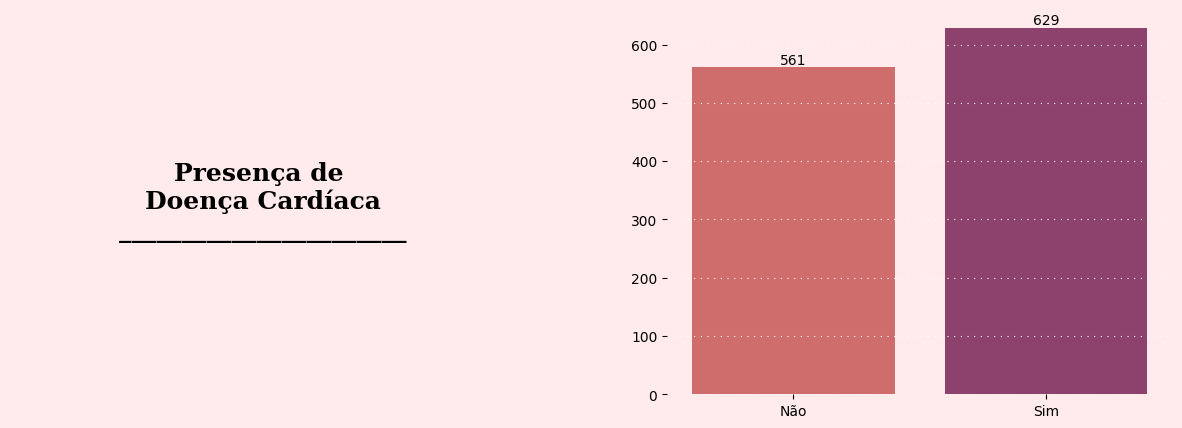

A quantidade de pacientes com doenças cardíacas é 52.86%.


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})


bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
# Subplot 1: Título
axes[0].text(0.5, 0.5, "Presença de \nDoença Cardíaca\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.countplot(ax=axes[1], data=df, x='target', palette=color_palette)
axes[1].set(xlabel="", ylabel="", xticklabels=["Não","Sim"])
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()
total_cardiacos = df['target'].value_counts()['Cardíaco']
percentual_doencas = (total_cardiacos / len(df['target'])) * 100
print(f"A quantidade de pacientes com doenças cardíacas é {percentual_doencas:.2f}%.")

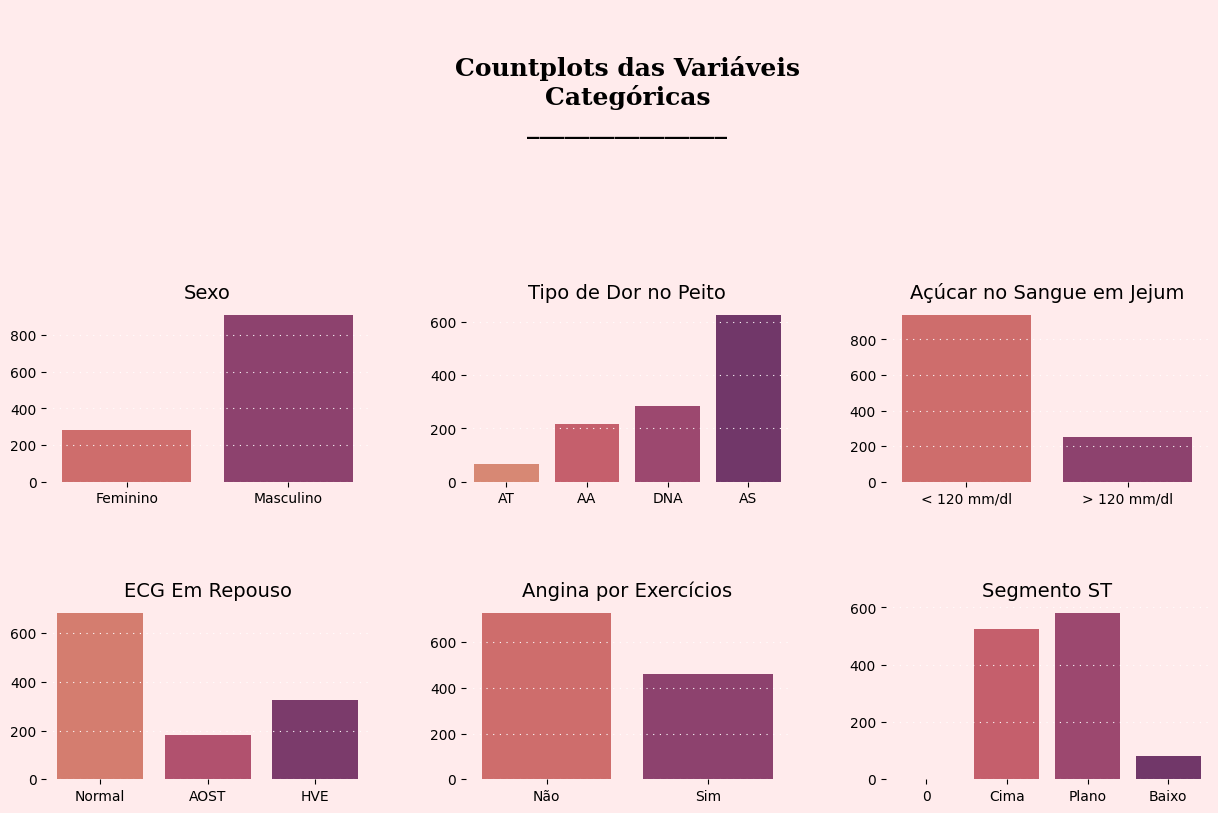

É possível ver um dado faltante na coluna "ST slope", que será tratado futuramente.




In [17]:

# Crie a estrutura de subplots
fig, axes = plt.subplots(3, 3, figsize=(15,10), gridspec_kw={'wspace': 0.3, 'hspace': 0.7})
bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 

#linha 01
axes[0,0].axis('off')
axes[0, 1].set_facecolor(bg_color) 
axes[0, 1].text(0.5, 0.5, "Countplots das Variáveis\nCategóricas\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0, 1].axis('off') 
axes[0,2].axis('off')

#linha 02
sns.countplot(ax=axes[1, 0], data=df, x='sex', palette=color_palette)
axes[1,0].set(xlabel="", ylabel="", xticklabels=["Feminino","Masculino"])
axes[1,0].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,0].set_title("Sexo", fontsize=14)
axes[1,0].set_facecolor(bg_color)
axes[1,0].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.countplot(ax=axes[1, 1], data=df, x='chest pain type', palette=color_palette)
axes[1,1].set(xlabel="", ylabel="", xticklabels=["AT","AA","DNA","AS"])
axes[1,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,1].set_title("Tipo de Dor no Peito", fontsize=14)
axes[1,1].set_facecolor(bg_color)
axes[1,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.countplot(ax=axes[1, 2], data=df, x='fasting blood sugar', palette=color_palette)
axes[1,2].set(xlabel="", ylabel="", xticklabels=["< 120 mm/dl","> 120 mm/dl"])
axes[1,2].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,2].set_title("Açúcar no Sangue em Jejum", fontsize=14)
axes[1,2].set_facecolor(bg_color)
axes[1,2].spines[['top', 'left', 'right', 'bottom']].set_visible(False)


#linha 03
sns.countplot(ax=axes[2, 0], data=df, x='resting ecg', palette=color_palette)
axes[2,0].set(xlabel="", ylabel="", xticklabels=["Normal","AOST","HVE"])
axes[2,0].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[2,0].set_title("ECG Em Repouso", fontsize=14)
axes[2,0].set_facecolor(bg_color)
axes[2,0].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.countplot(ax=axes[2, 1], data=df, x='exercise angina', palette=color_palette)
axes[2,1].set(xlabel="", ylabel="", xticklabels=["Não","Sim"])
axes[2,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[2,1].set_title("Angina por Exercícios", fontsize=14)
axes[2,1].set_facecolor(bg_color)
axes[2,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.countplot(ax=axes[2, 2], data=df, x='ST slope', palette=color_palette)
axes[2,2].set(xlabel="", ylabel="")
axes[2,2].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[2,2].set_title("Segmento ST", fontsize=14)
axes[2,2].set_facecolor(bg_color)
axes[2,2].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()
plt.show()


print('É possível ver um dado faltante na coluna "ST slope", que será tratado futuramente.\n\n')

### **Observações Gerais**

* Em relação aos tipos de dor no peito, o tipo 4 (`assintomática`) é o mais prevalente, seguido pelo tipo 3 (`dor não anginosa`). A `angina típica`, por sua vez, apresenta a menor frequência. Essa informação contribui para a compreensão da prevalência de diferentes manifestações de dor no peito dentro do grupo estudado.

* No que diz respeito aos resultados do eletrocardiograma em repouso, o padrão `normal` é o mais comum, seguido pelo tipo `possível ou definida hipertrofia ventricular esquerda`. A `anormalidade da onda ST-T` é a menos frequente entre os resultados observados.


## **Visualização das Variáveis Quantitativas**

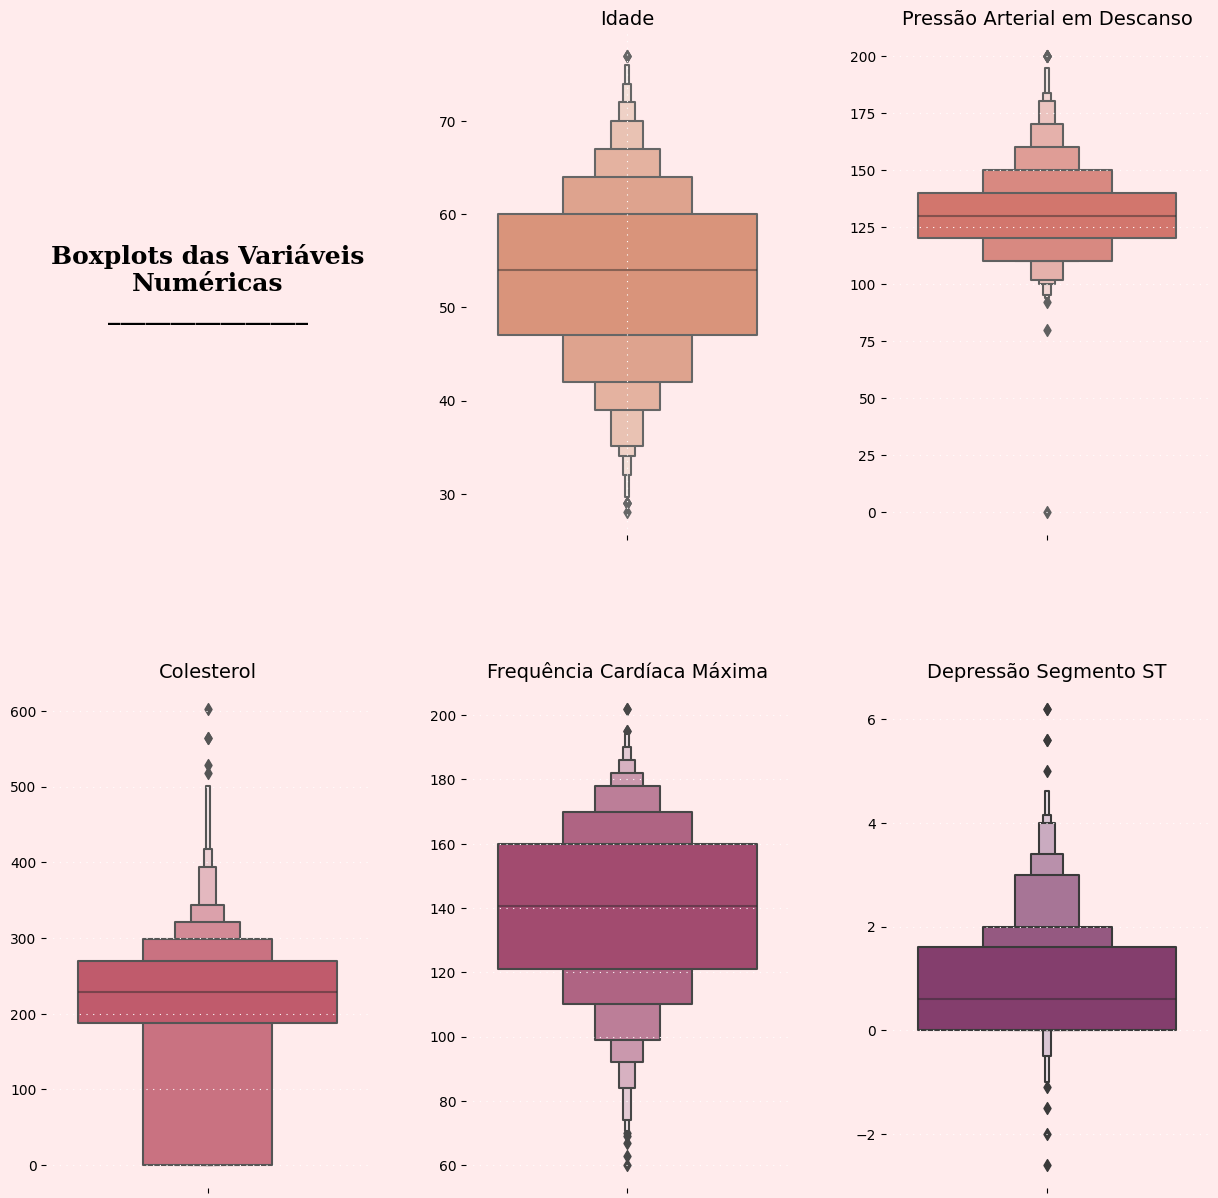

In [18]:
#Estrutura de subplots
fig, axes = plt.subplots(2, 3, figsize=(15,15), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
bg_color = "#ffebec"
color_palette = ['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']
fig.set_facecolor(bg_color) 
#linha 01
axes[0,0].axis('off')
axes[0, 0].set_facecolor(bg_color) 
axes[0, 0].text(0.5, 0.5, "Boxplots das Variáveis\nNuméricas\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.boxenplot(ax=axes[0, 1], data=df, y='age', color='#e98d6b')
axes[0,1].grid(color='#ffffff', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
axes[0,1].set(xlabel="", ylabel="")
axes[0,1].set_title("Idade", fontsize=14)
axes[0,1].set_facecolor(bg_color)
axes[0,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.boxenplot(ax=axes[0, 2], data=df, y='resting bp s', orient='v', color='#e3685c')
axes[0,2].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[0,2].set(xlabel="", ylabel="")
axes[0,2].set_title("Pressão Arterial em Descanso", fontsize=14)
axes[0,2].set_facecolor(bg_color)
axes[0,2].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 02
sns.boxenplot(ax=axes[1, 0], data=df, y='cholesterol', orient='v', color='#d14a61')
axes[1,0].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,0].set(xlabel="", ylabel="")
axes[1,0].set_title("Colesterol", fontsize=14)
axes[1,0].set_facecolor(bg_color)
axes[1,0].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.boxenplot(ax=axes[1,1], data=df, y='max heart rate', orient='v', color='#b13c6c')
axes[1,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,1].set(xlabel="", ylabel="")
axes[1,1].set_title("Frequência Cardíaca Máxima", fontsize=14)
axes[1,1].set_facecolor(bg_color)
axes[1,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

sns.boxenplot(ax=axes[1,2], data=df, y='oldpeak', orient='v', color='#8f3371')
axes[1,2].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,2].set(xlabel="", ylabel="")
axes[1,2].set_title("Depressão Segmento ST", fontsize=14)
axes[1,2].set_facecolor(bg_color)
axes[1,2].spines[['top', 'left', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()


### **Observações Gerais**

* A maioria das variáveis numéricas exibe distribuições assimétricas, sugerindo uma distribuição não uniforme dos dados em relação à média. Essa característica indica que a mediana pode ser uma medida de tendência central mais adequada do que a média para representar essas variáveis.

Além disso, a presença de outliers é notável em diversas variáveis, destacando-se `resting bp s'` (pressão arterial em repouso) e `cholesterol`.

# **Análise Comparativa**
### **Variáveis Numéricas**

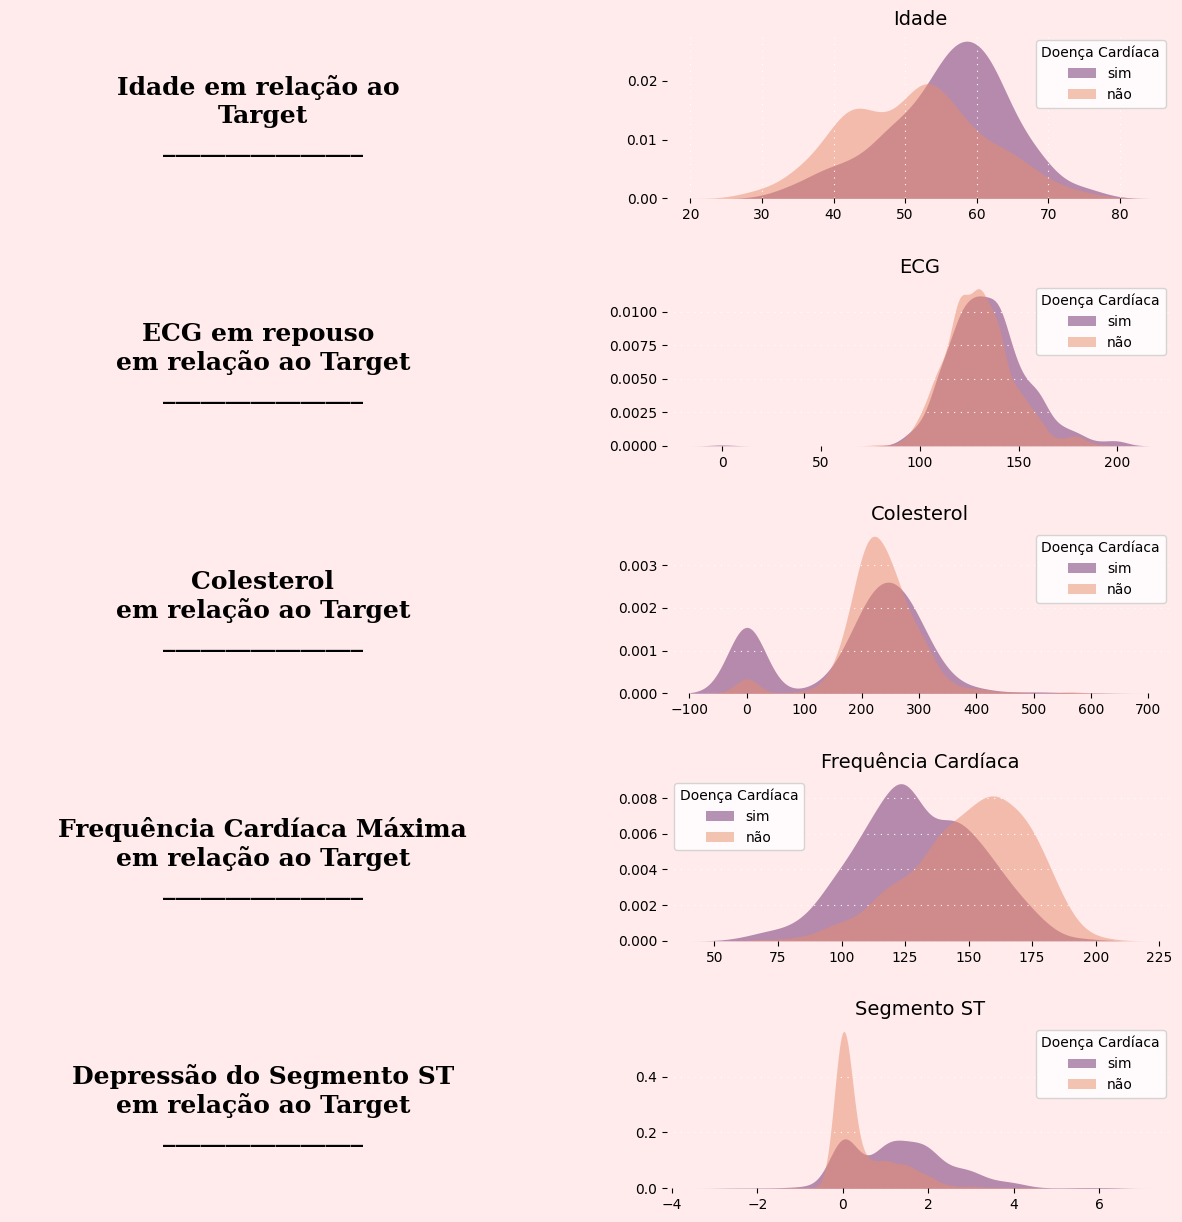

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(15,15), gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
bg_color = "#ffebec"
color_palette = ['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']
fig.set_facecolor(bg_color) 
#linha 01
axes[0,0].axis('off')
axes[0, 0].set_facecolor(bg_color) 
axes[0, 0].text(0.5, 0.5, "Idade em relação ao \nTarget\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.kdeplot(ax=axes[0, 1], data=df, x='age',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[0,1].grid(color='#ffffff', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
axes[0,1].set(xlabel="", ylabel="")
axes[0,1].set_title("Idade", fontsize=14)
axes[0,1].set_facecolor(bg_color)
axes[0,1].legend(title="Doença Cardíaca", labels=['sim', 'não'])
axes[0,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)



#linha 02
axes[1,0].axis('off')
axes[1, 0].set_facecolor(bg_color) 
axes[1, 0].text(0.5, 0.5, "ECG em repouso \nem relação ao Target\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.kdeplot(ax=axes[1, 1], data=df, x='resting bp s',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[1,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,1].set(xlabel="", ylabel="")
axes[1,1].set_title("ECG", fontsize=14)
axes[1,1].set_facecolor(bg_color)
axes[1,1].legend(title="Doença Cardíaca", labels=['sim', 'não'])
axes[1,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 03
axes[2,0].axis('off')
axes[2, 0].set_facecolor(bg_color) 
axes[2, 0].text(0.5, 0.5, "Colesterol\nem relação ao Target\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.kdeplot(ax=axes[2, 1], data=df, x='cholesterol',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[2,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[2,1].set(xlabel="", ylabel="")
axes[2,1].set_title("Colesterol", fontsize=14)
axes[2,1].set_facecolor(bg_color)
axes[2,1].legend(title="Doença Cardíaca", labels=['sim', 'não'])
axes[2,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 04
axes[3,0].axis('off')
axes[3, 0].set_facecolor(bg_color) 
axes[3, 0].text(0.5, 0.5, "Frequência Cardíaca Máxima\nem relação ao Target\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.kdeplot(ax=axes[3, 1], data=df, x='max heart rate',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[3,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[3,1].set(xlabel="", ylabel="")
axes[3,1].set_title("Frequência Cardíaca", fontsize=14)
axes[3,1].set_facecolor(bg_color)
axes[3,1].legend(title="Doença Cardíaca", labels=['sim', 'não'], loc="upper left")
axes[3,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 05
axes[4,0].axis('off')
axes[4, 0].set_facecolor(bg_color) 
axes[4, 0].text(0.5, 0.5, "Depressão do Segmento ST\nem relação ao Target\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.kdeplot(ax=axes[4, 1], data=df, x='oldpeak',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[4,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[4,1].set(xlabel="", ylabel="")
axes[4,1].set_title("Segmento ST", fontsize=14)
axes[4,1].set_facecolor(bg_color)
axes[4,1].legend(title="Doença Cardíaca", labels=['sim', 'não'])
axes[4,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()
plt.show()

### **Observações Gerais**

* A análise das variáveis `age` (idade) e `cholesterol` (colesterol) revelou uma considerável sobreposição nas distribuições dos grupos com e sem doença cardíaca. Apesar de a variável idade apresentar um leve desvio em direção à presença da doença, a análise sugere que essas variáveis, isoladamente, podem não ser fortes preditores da doença.

* Em contraste, as variáveis `max heart rate` (frequência cardíaca máxima) e `oldpeak` (depressão do Segmento ST) exibiram distribuições distintas entre os dois grupos. Essa observação indica que essas variáveis podem ter maior relevância na previsão da doença cardíaca.

### **Variáveis Categóricas**

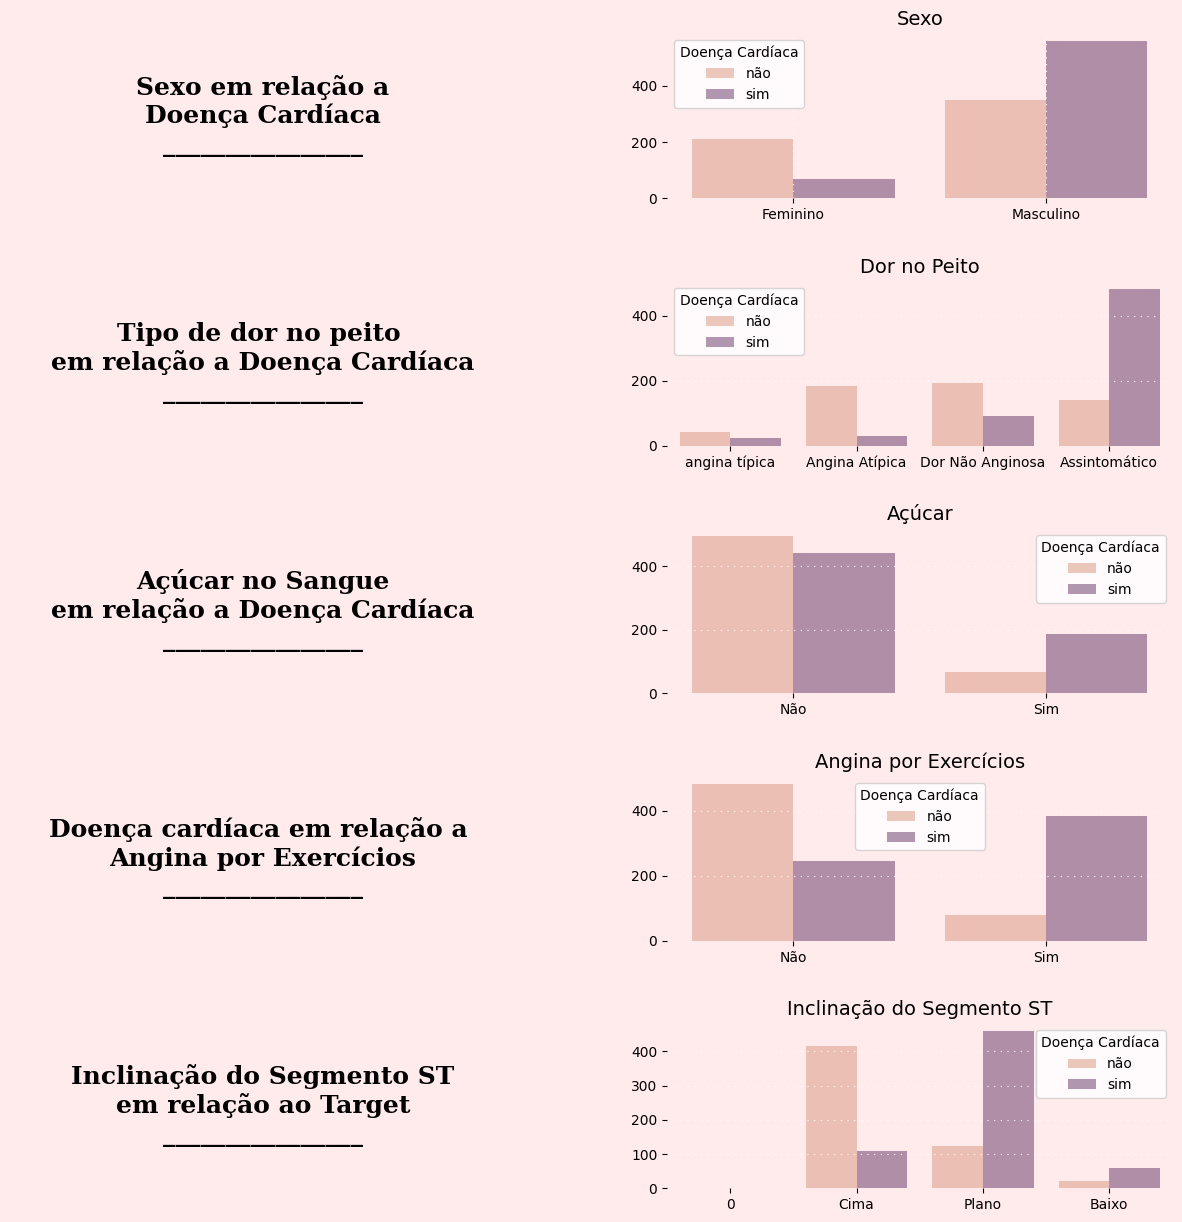

In [20]:
fig, axes = plt.subplots(5, 2, figsize=(15,15), gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
bg_color = "#ffebec"
color_palette = ['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']
fig.set_facecolor(bg_color) 
#linha 01
axes[0,0].axis('off')
axes[0, 0].set_facecolor(bg_color) 
axes[0, 0].text(0.5, 0.5, "Sexo em relação a\nDoença Cardíaca\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.countplot(ax=axes[0, 1], data=df, x='sex',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[0,1].grid(color='#ffffff', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
axes[0,1].set(xlabel="", ylabel="")
axes[0,1].set_title("Sexo", fontsize=14)
axes[0,1].set_facecolor(bg_color)
axes[0,1].legend(title="Doença Cardíaca", labels=['não', 'sim'])
axes[0,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)



#linha 02
axes[1,0].axis('off')
axes[1, 0].set_facecolor(bg_color) 
axes[1, 0].text(0.5, 0.5, "Tipo de dor no peito \nem relação a Doença Cardíaca\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.countplot(ax=axes[1, 1], data=df, x='chest pain type',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[1,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1,1].set(xlabel="", ylabel="")
axes[1,1].set_title("Dor no Peito", fontsize=14)
axes[1,1].set_facecolor(bg_color)
axes[1,1].legend(title="Doença Cardíaca", labels=['não', 'sim'])
axes[1,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 03
axes[2,0].axis('off')
axes[2, 0].set_facecolor(bg_color) 
axes[2, 0].text(0.5, 0.5, "Açúcar no Sangue\nem relação a Doença Cardíaca\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.countplot(ax=axes[2, 1], data=df, x='fasting blood sugar',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[2,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[2,1].set(xlabel="", ylabel="")
axes[2,1].set_title("Açúcar", fontsize=14)
axes[2,1].set_facecolor(bg_color)
axes[2,1].legend(title="Doença Cardíaca", labels=['não', 'sim'])
axes[2,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 04
axes[3,0].axis('off')
axes[3, 0].set_facecolor(bg_color) 
axes[3, 0].text(0.5, 0.5, "Doença cardíaca em relação a \nAngina por Exercícios\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.countplot(ax=axes[3, 1], data=df, x='exercise angina',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[3,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[3,1].set(xlabel="", ylabel="")
axes[3,1].set_title("Angina por Exercícios", fontsize=14)
axes[3,1].set_facecolor(bg_color)
axes[3,1].legend(title="Doença Cardíaca", labels=['não', 'sim'])
axes[3,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#linha 05
axes[4,0].axis('off')
axes[4, 0].set_facecolor(bg_color) 
axes[4, 0].text(0.5, 0.5, "Inclinação do Segmento ST\nem relação ao Target\n________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')

sns.countplot(ax=axes[4, 1], data=df, x='ST slope',hue="target", fill=True,palette=['#e98d6b','#6c2b6d'], alpha=.5, linewidth=0)
axes[4,1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[4,1].set(xlabel="", ylabel="")
axes[4,1].set_title("Inclinação do Segmento ST", fontsize=14)
axes[4,1].set_facecolor(bg_color)
axes[4,1].legend(title="Doença Cardíaca", labels=['não', 'sim'])
axes[4,1].spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.tight_layout()
plt.show()

## **Observações Gerais** 

* A análise do gráfico sugere uma prevalência maior de doença cardíaca em homens em comparação com as mulheres. Essa observação corrobora o conhecimento médico estabelecido, reforçando o sexo masculino como um potencial fator de risco.

* Em relação à dor no peito, indivíduos sem doença cardíaca costumam ser assintomáticos. A `dor não anginosa` (NA) apresenta uma distribuição relativamente equilibrada entre os dois grupos. Por outro lado, a `angina típica` e `atípica` (AT e AA) mostram uma proporção maior de indivíduos com doença cardíaca, sugerindo seu potencial como indicadores de risco.

* Quanto ao `açúcar no sangue em jejum`, a maioria dos indivíduos, independentemente da presença de doença cardíaca, apresenta níveis abaixo de 120 mg/dl. No entanto, observa-se um aumento na proporção de indivíduos com doença cardíaca na categoria "> 120 mg/dl", sugerindo uma possível associação entre o alto nível de `açúcar no sangue em jejum` e o risco de doença cardíaca.

* A ausência de `angina induzida por exercício` é a condição mais prevalente em ambos os grupos. Contudo, a presença dela é mais frequente em indivíduos com doença cardíaca, indicando sua forte associação com a condição.

* Por fim, o `segmento ST plano` é a categoria mais comum em ambos os grupos. Um `segmento ST ascendente` é relativamente raro, especialmente em indivíduos com doença cardíaca. Um `segmento ST descendente` parece estar mais associado à presença de doença cardíaca, o que aponta para seu potencial como um indicador de risco.

### **Visão Geral das Correlações em um Pairplot**

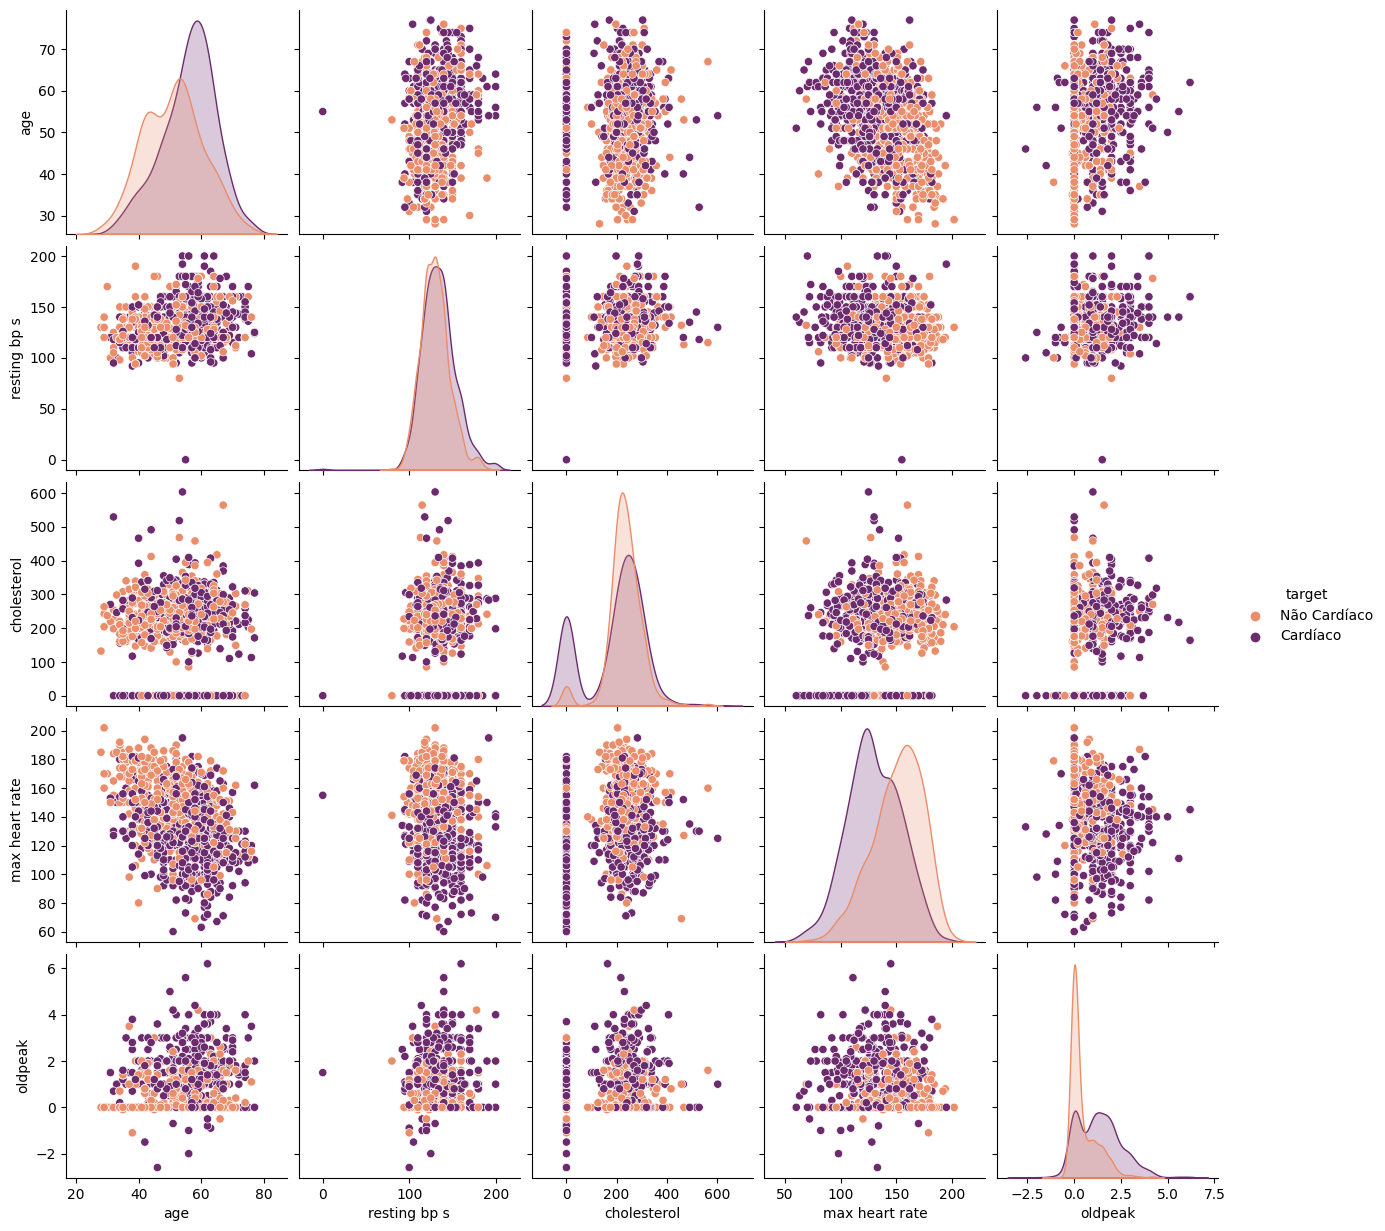

In [21]:
sns.pairplot(df,hue='target',palette = ['#e98d6b','#6c2b6d'])
bg_color = "#ffebec"
fig.set_facecolor(bg_color) 
plt.show()

Algumas variáveis mostram uma correlação linear moderada, como `age` e `resting bp s`, enquanto outras parecem ter uma relação não linear ou fraca.
A separabilidade entre as classes (com e sem doença cardíaca) varia entre os pares de variáveis. Algumas variáveis, como `oldpeak` e `max heart rate`, parecem ter uma melhor capacidade de discriminação entre as classes.
Os histogramas na diagonal principal mostram a distribuição de cada variável numérica para ambas as classes, permitindo comparar suas formas e identificar possíveis diferenças.

## **Heatmap com todas as variáveis**

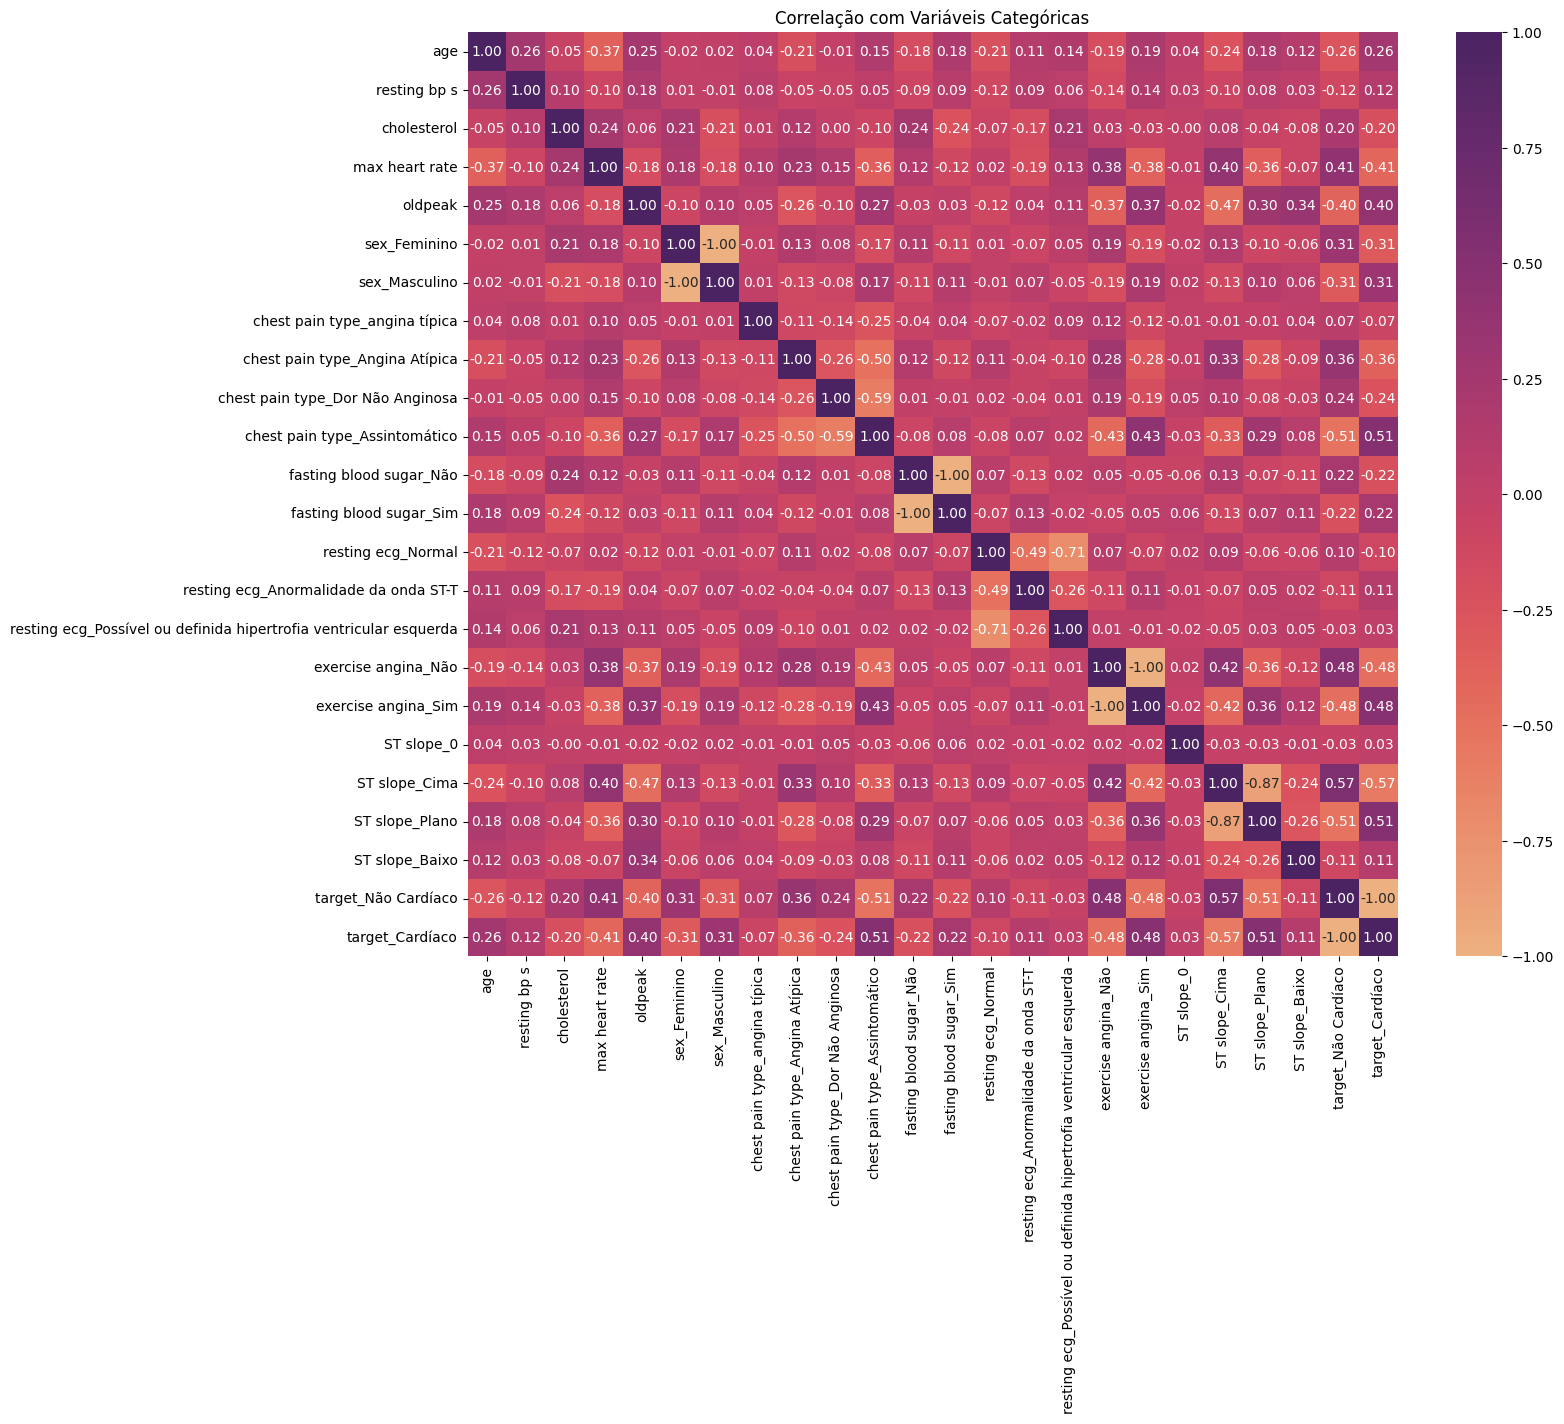

In [22]:
categorical_cols = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtype != 'object']

df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlação com Variáveis Categóricas')
plt.show()


* **Idade e Frequência Cardíaca Máxima:** Constatou-se uma correlação negativa moderada entre a `idade do paciente` e sua `frequência cardíaca máxima` alcançada (correlação de -0.37). Essa relação sugere que, em geral, a frequência cardíaca máxima tende a diminuir com o aumento da idade, o que é um padrão esperado.

* **Pressão Arterial em Repouso e Colesterol:** A correlação entre `pressão arterial em repouso` e `colesterol` se mostrou fraca e positiva (correlação de 0.1). Isso indica que, dentro deste conjunto de dados específico, não existe uma forte relação linear entre essas duas variáveis.

* **Outras correlações:** A matriz também evidenciou outras correlações relevantes, como a correlação negativa entre `oldpeak` (depressão de ST induzida por exercício) e `ST slope_1` (inclinação plana do segmento ST), e a correlação positiva entre `oldpeak` e `ST slope_3` (inclinação descendente do segmento ST).

* **Sexo e Doença Cardíaca:** A codificação *one-hot* da variável `sex` gerou duas colunas: `sex_0` (feminino) e `sex_1` (masculino). A correlação negativa entre `sex_1` e `target_0` (ausência de doença cardíaca), juntamente com a correlação positiva entre `sex_1` e `target_1` (presença de doença cardíaca), reforçam a observação prévia de que homens apresentam maior probabilidade de desenvolver doença cardíaca.

* **Tipo de Dor no Peito e Doença Cardíaca:** As correlações entre as colunas codificadas para `chest pain type` e `target` indicam que a *angina típica* (`chest pain type_1`) e a *angina atípica* (`chest pain type_2`) estão mais associadas à presença de doença cardíaca. Em contrapartida, a *dor não anginosa* (`chest pain type_3`) e a *dor assintomática* (`chest pain type_4`) estão mais associadas à ausência da doença.

* **Outras correlações:** A matriz também revelou outras correlações envolvendo as variáveis categóricas codificadas, como a associação entre `exercise angina_1` (presença de angina induzida por exercício) e `target_1` (presença de doença cardíaca). 

<a id="perguntas"></a>
# **Perguntas de partida e hipóteses**

* Qual a distribuição de idade dos pacientes? 

**Essa pergunta busca entender a faixa etária dos pacientes incluídos no estudo, o que pode ser relevante para identificar grupos de maior risco.**

* Existe diferença na prevalência de doença cardíaca entre homens e mulheres? 

**Essa pergunta busca investigar se o sexo do paciente é um fator de risco para a doença cardíaca.**

* Qual o tipo de dor no peito mais frequente em pacientes com doença cardíaca? 

**Essa pergunta busca identificar se existe alguma associação entre o tipo de dor no peito e a presença da doença.**

* Qual a relação entre o nível de colesterol e a presença de doença cardíaca? 

**Essa pergunta busca verificar se existe uma correlação entre o colesterol e o risco de doença cardíaca.**

* A angina induzida por exercício é um fator de risco para doença cardíaca? 

**Essa pergunta busca entender se a presença de angina durante o exercício está associada a um maior risco de doença cardíaca.**

* Qual a influência da depressão do segmento ST (oldpeak) na probabilidade de doença cardíaca?

**Essa pergunta busca avaliar se a depressão do segmento ST, que indica o estresse do coração durante o exercício, é um preditor relevante da doença.**

* Quais são os principais fatores de risco para doença cardíaca neste dataset? 

**Essa pergunta busca identificar, através de técnicas de análise multivariada, quais atributos têm maior influência na previsão da doença cardíaca.** 

<a id="recap01"></a>
## **Recapitulação**

Até o presente momento, o conjunto de dados, o qual compreende informações sobre pacientes com e sem doenças cardíacas, foi submetido a uma exploração com o intuito de identificar potenciais fatores de risco e padrões associados à doença.

**Análise Univariada**

* **Variáveis Categóricas:** A distribuição de frequência das variáveis categóricas, como `sexo`, `tipo de dor no peito`, `níveis de açúcar no sangue em jejum`, resultados de `ECG em repouso`, `angina induzida por exercício` e `inclinação do segmento ST`, foi visualizada por meio de `countplots`. Observou-se um desbalanceamento em algumas variáveis, como a predominância do sexo masculino, e identificaram-se categorias potencialmente associadas à presença de doença cardíaca, como `angina típica` e `atípica`, além da `inclinação descendente do segmento ST`.

* **Variáveis Numéricas:** A distribuição das variáveis numéricas, como `idade`, `pressão arterial em repouso`, `colesterol`, `frequência cardíaca máxima` e `depressão de ST induzida por exercício` (`oldpeak`), foi examinada utilizando `boxplots` e `kdeplots`. A presença de `outliers` foi observada em algumas variáveis, e diferenças nas distribuições entre os grupos com e sem doença cardíaca foram identificadas, sugerindo o potencial preditivo dessas variáveis.

**Análise Bivariada**

* **Matriz de Correlação:** Uma `matriz de correlação` abrangendo todas as variáveis, incluindo as categóricas após a codificação `one-hot`, foi gerada. Essa análise revelou correlações interessantes, como a relação negativa entre `idade` e `frequência cardíaca máxima`, e a associação positiva entre a `depressão de ST` e a inclinação descendente do `segmento ST`. A matriz também destacou a importância de variáveis como `oldpeak`, `max heart rate` e `sex` na predição da doença cardíaca.

* **Countplots com 'target' como hue**: A relação entre a variável alvo (`presença de doença cardíaca`) e as variáveis categóricas foi visualizada utilizando `countplots` com o `target` como hue. Essa análise possibilitou a observação da prevalência da doença em diferentes categorias e a identificação de potenciais fatores de risco, como `sexo masculino`, `angina típica` e `atípica`, alto nível de `açúcar no sangue em jejum` e presença de `angina induzida por exercício`.

---

<a id="parte02"></a>
# **2. Análise da variáveis através das perguntas apresentadas**

Nesta seção, se buscará responder as questões obtidas a partir da análise exploratória dos dados

<a id="idade"></a>
### **Qual a distribuição de idade dos pacientes?**

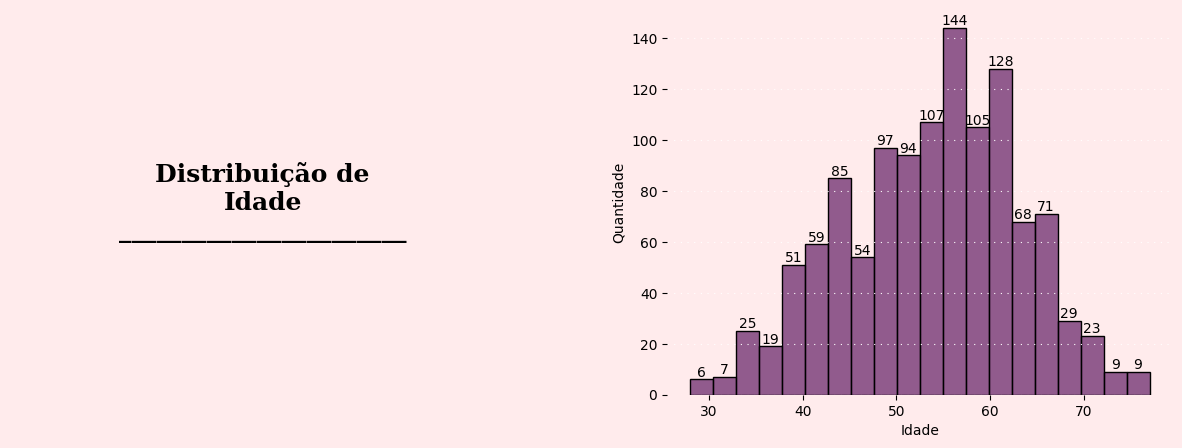

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})


bg_color = "#ffebec"
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
axes[0].text(0.5, 0.5, "Distribuição de\nIdade\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.histplot(ax=axes[1], data=df, x='age', color=['#6c2b6d'])
axes[1].set(xlabel="Idade", ylabel="Quantidade")
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()


Essa informação é relevante, pois a `idade` é um grande fator de risco para doenças cardíacas. A análise da distribuição de idade nos permite entender melhor o perfil da população estudada e como ela pode influenciar a prevalência da doença neste grupo.

<a id="homem/mulher"></a>
### **Existe diferença na prevalência de doença cardíaca entre homens e mulheres?**

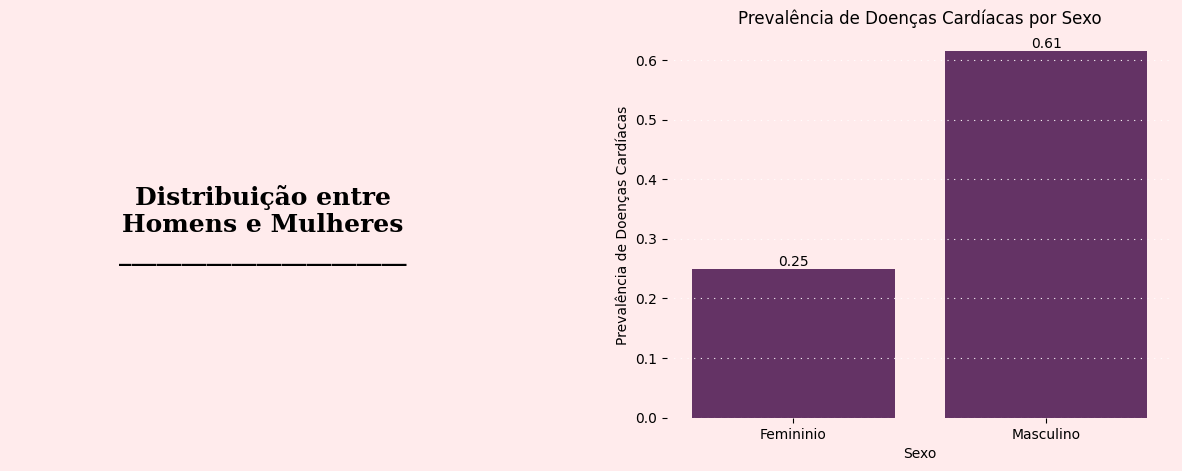

In [24]:
df['sexo'] = df['sex'].cat.codes
df['Doença Cardíaca'] = df['target'].cat.codes

prevalence_by_sex = df.groupby('sexo')['Doença Cardíaca'].mean()

prevalence_values = prevalence_by_sex.values.tolist() 

fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
fig.set_facecolor(bg_color)

axes[0].set_facecolor(bg_color)
axes[1].set_facecolor(bg_color)
axes[0].text(0.5, 0.5, "Distribuição entre\nHomens e Mulheres\n_______________________",
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off')

# Change the color argument to a single color
sns.barplot(ax=axes[1], x=prevalence_by_sex.index, y=prevalence_values, color='#6c2b6d') 

axes[1].set(xlabel="Sexo", ylabel="Prevalência de Doenças Cardíacas", xticklabels=["Femininio","Masculino"], title="Prevalência de Doenças Cardíacas por Sexo")
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0, dashes=(1,5))

for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 5),
                 textcoords = 'offset points')

plt.show() 



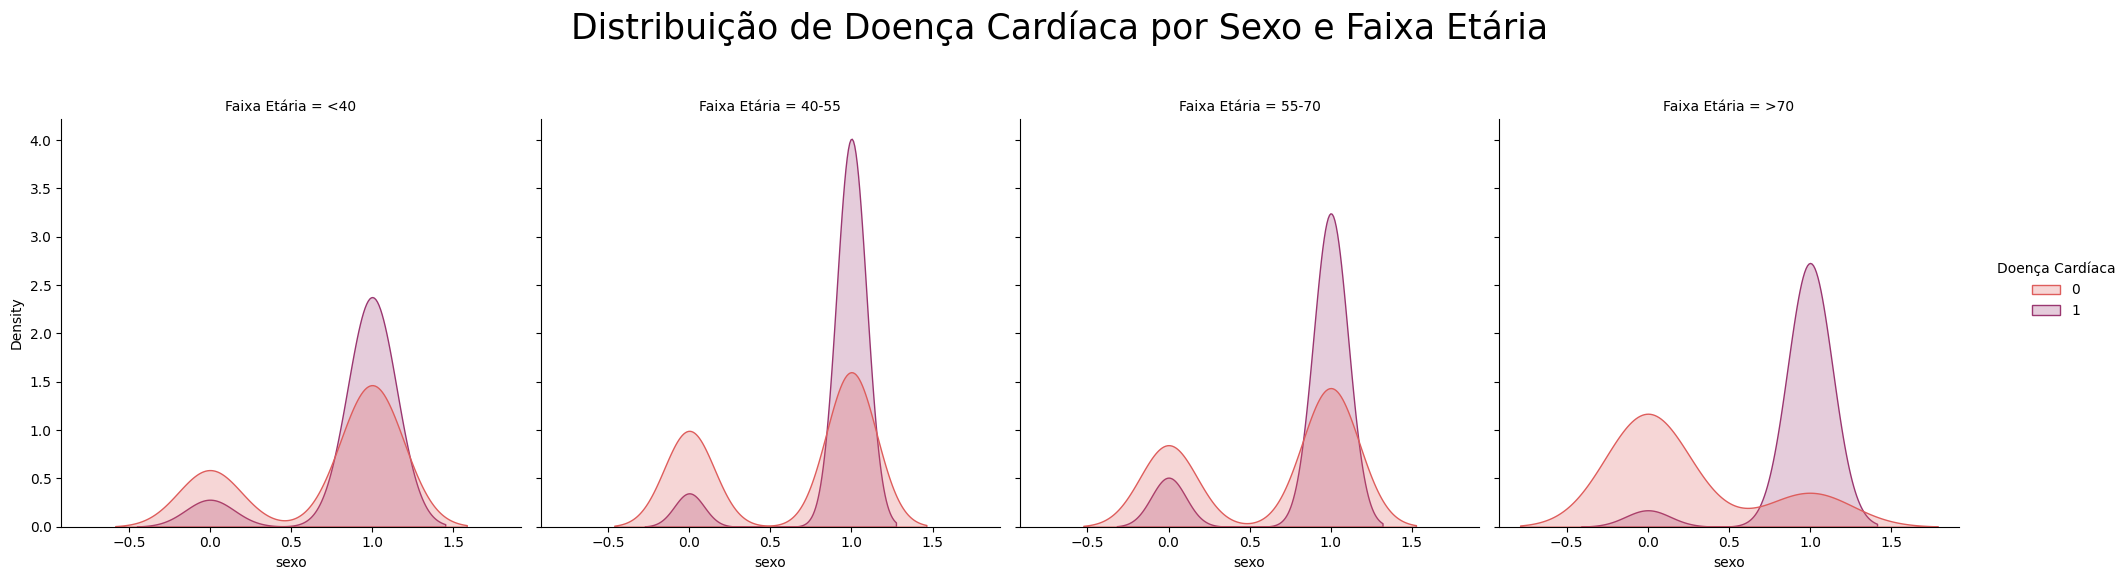

In [25]:
df['Faixa Etária'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], labels=['<40', '40-55', '55-70', '>70'])

sns.displot(data=df, x='sexo', hue='Doença Cardíaca', col='Faixa Etária', palette='flare', kind='kde', fill=True, common_norm=False)

plt.suptitle('Distribuição de Doença Cardíaca por Sexo e Faixa Etária', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

A `frequência de doenças cardíacas` é muito maior entre os `homens`, principalmente entre os `40 e 55 anos`, as `mulheres` a partir dos `40 anos` tem um leve aumento de risco, mantendo-se estável nas faixas etárias seguintes.

<a id="tipodedor"></a>
### **Qual o tipo de dor no peito mais frequente em pacientes com doença cardíaca?**

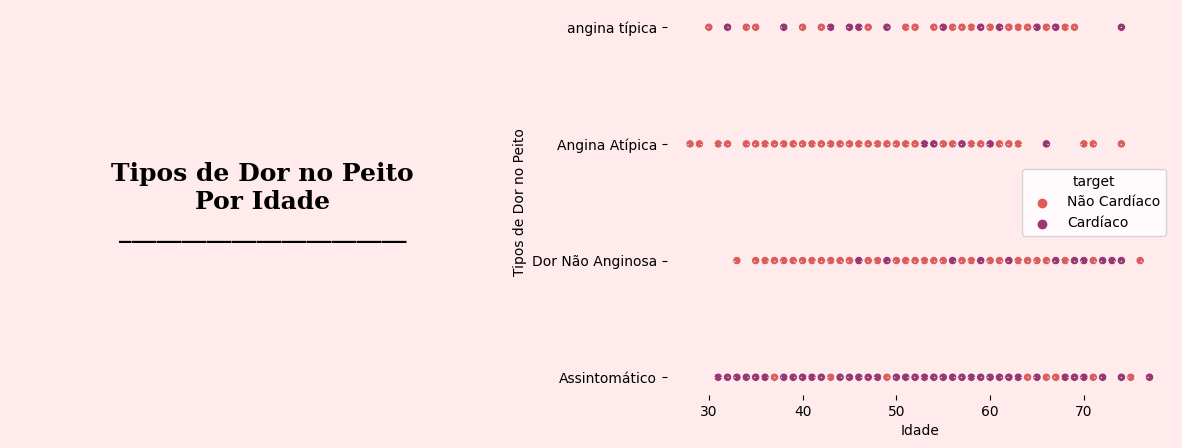

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
fig.set_facecolor(bg_color)

axes[0].set_facecolor(bg_color)
axes[1].set_facecolor(bg_color)
axes[0].text(0.5, 0.5, "Tipos de Dor no Peito\nPor Idade\n_______________________",
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off')

sns.scatterplot(ax=axes[1], x=df['age'],y=df['chest pain type'], hue=df["target"], palette='flare')
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0, dashes=(1,5))
axes[1].set(xlabel="Idade", ylabel="Tipos de Dor no Peito")


for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
plt.show()

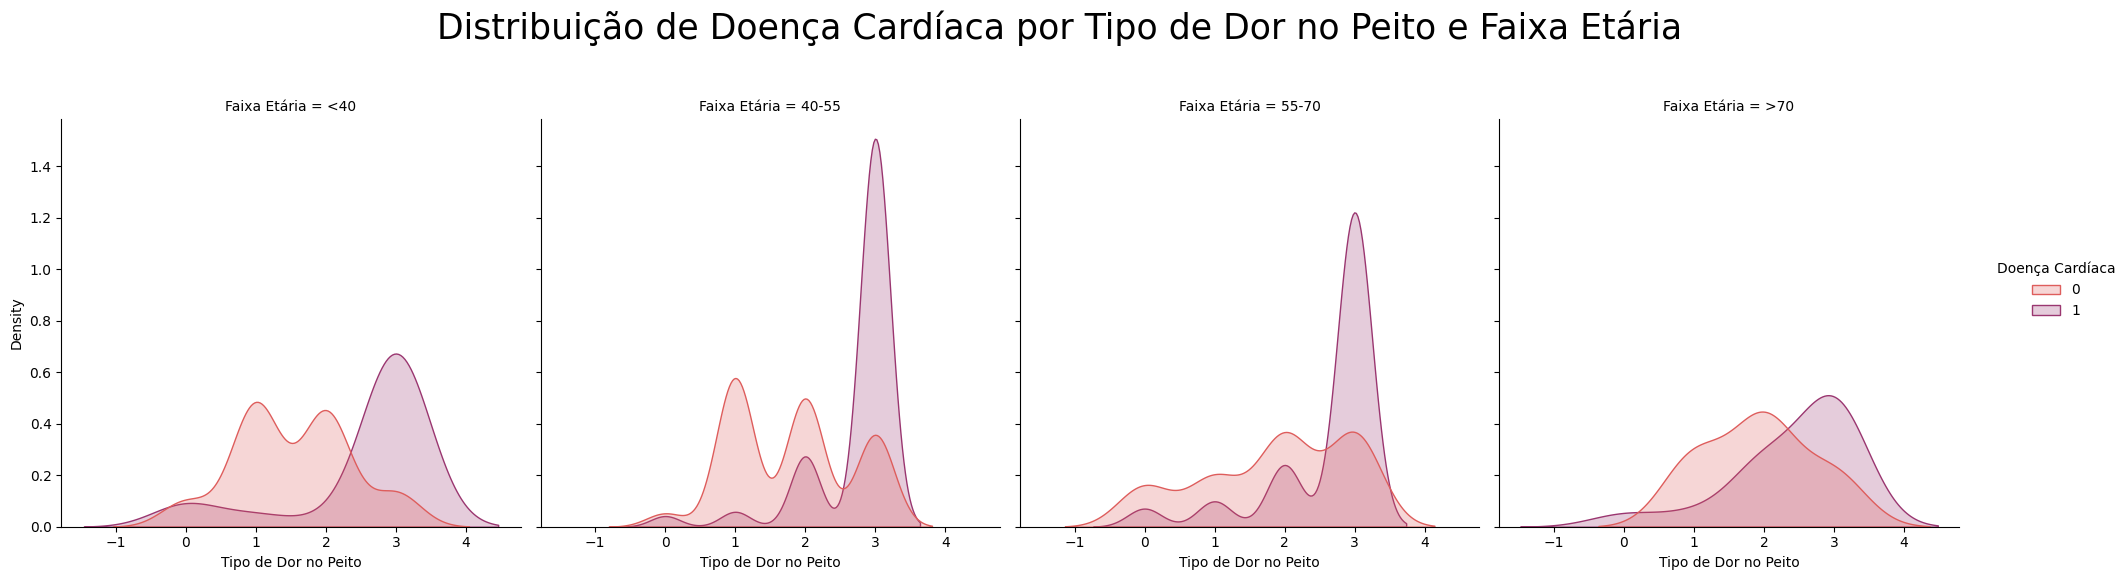

In [27]:
df['Faixa Etária'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], labels=['<40', '40-55', '55-70', '>70'])
df['Tipo de Dor no Peito'] = df['chest pain type'].cat.codes

sns.displot(ax=axes, data=df, x='Tipo de Dor no Peito', hue='Doença Cardíaca', col='Faixa Etária', palette='flare', kind='kde', fill=True, common_norm=False)
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.suptitle('Distribuição de Doença Cardíaca por Tipo de Dor no Peito e Faixa Etária', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

A distribuição do tipo de dor no peito por faixa etária revela que a dor assintomática se torna mais comum com o avanço da idade, enquanto a dor não anginosa é mais prevalente em pacientes mais jovens. A angina atípica e a angina típica, embora menos frequentes, apresentam padrões distintos de distribuição entre as faixas etárias, o que pode ser relevante para a avaliação clínica e o diagnóstico diferencial de doenças cardíacas.

<a id="colesterol"></a>
### **Qual a relação entre o nível de colesterol e a presença de doença cardíaca?**

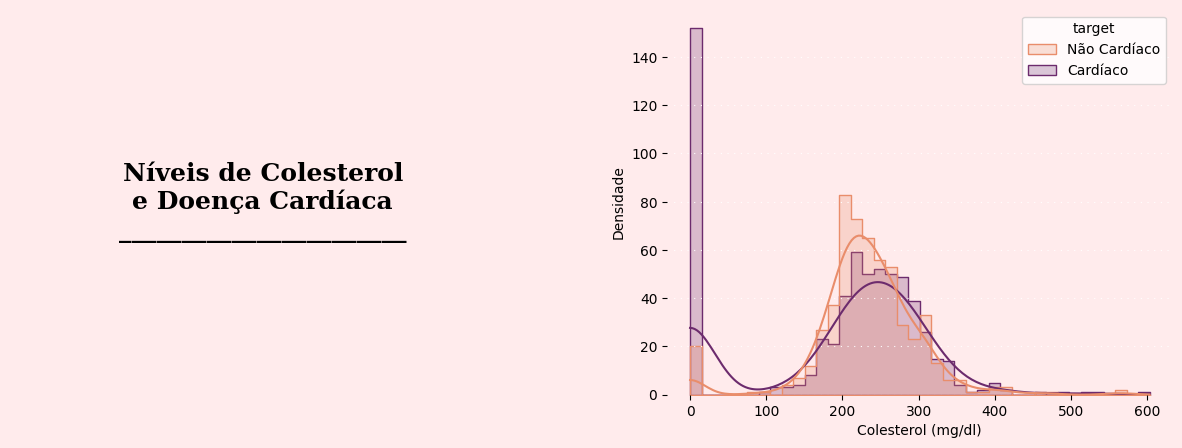

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
# Subplot 1: Título
axes[0].text(0.5, 0.5, "Níveis de Colesterol\ne Doença Cardíaca\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.histplot(ax=axes[1], data=df, x='cholesterol', hue='target', kde=True, element='step', palette=['#e98d6b','#6c2b6d'])
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Colesterol (mg/dl)", ylabel="Densidade")


for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()



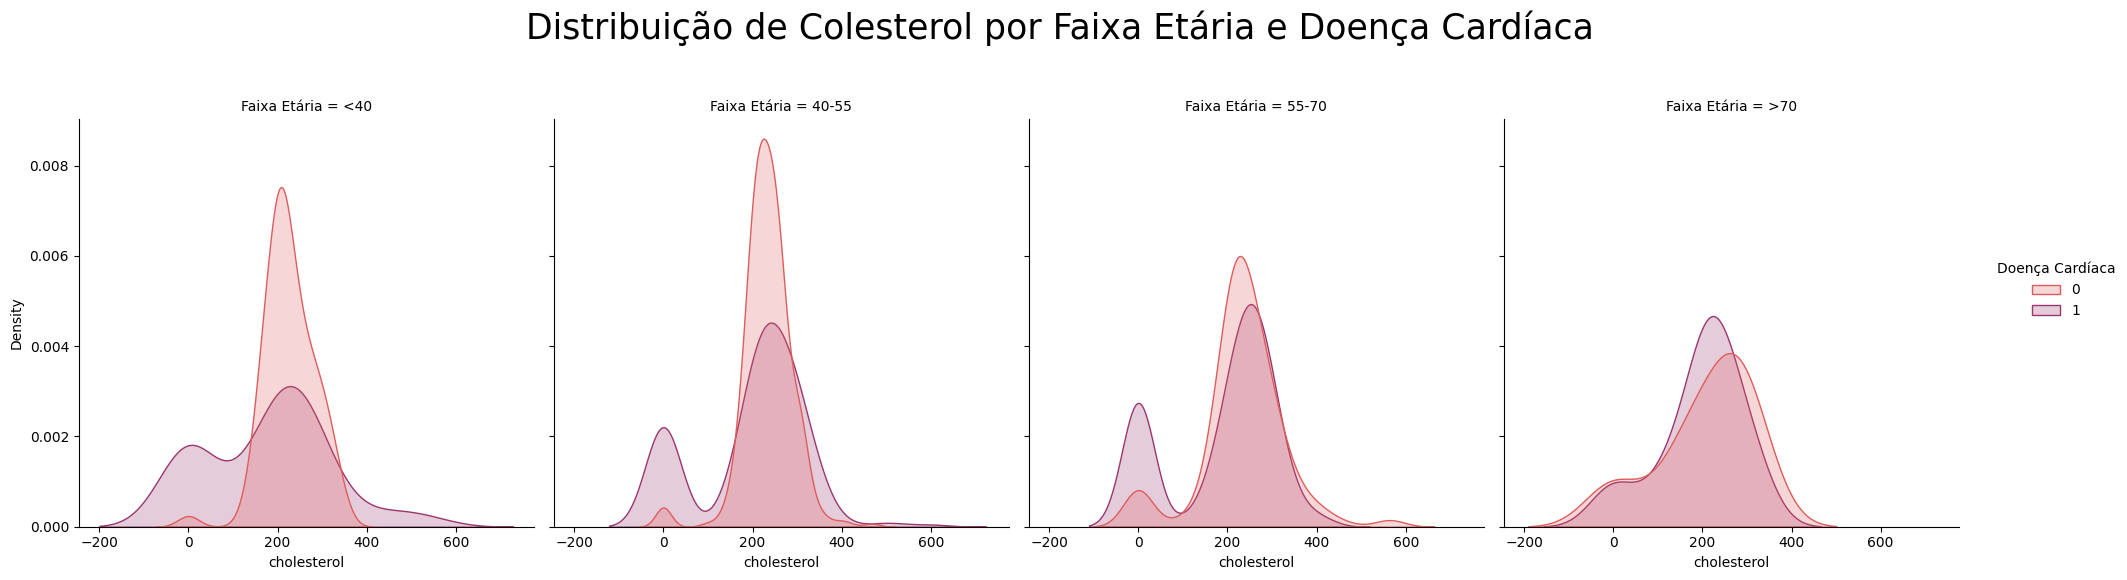

In [29]:
sns.displot(ax=axes, data=df, x='cholesterol', hue='Doença Cardíaca', col='Faixa Etária', palette='flare', kind='kde', fill=True, common_norm=False)
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Densidade", ylabel="Colesterol")

plt.suptitle('Distribuição de Colesterol por Faixa Etária e Doença Cardíaca', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

A análise da distribuição de colesterol em relação à doença cardíaca e à faixa etária revelou os seguintes pontos:

* **Sobreposição entre grupos:** Em todas as faixas etárias, observa-se uma sobreposição considerável nas distribuições de colesterol entre pacientes com e sem doença cardíaca. Essa constatação reforça a ideia de que o colesterol, isoladamente, não é um preditor definitivo da doença.

* **Aumento da prevalência com a idade:** Em geral, a prevalência de doença cardíaca aumenta com a idade, independentemente dos níveis de colesterol. Isso sugere que a idade é um fator de risco independente e crucial na avaliação do risco cardiovascular.

* **Média de colesterol ligeiramente maior em pacientes sem doença:** Em algumas faixas etárias, especialmente entre 40-55 e 55-70 anos, a média de colesterol parece ser ligeiramente maior no grupo sem doença cardíaca. Essa observação contra-intuitiva pode indicar a influência de outros fatores de risco ou a necessidade de investigar subgrupos específicos da população para compreender melhor essa relação.

* **Assimetria à direita:** A distribuição do colesterol mantém sua assimetria à direita em todas as faixas etárias, com alguns indivíduos apresentando níveis muito altos, independentemente da presença da doença. Essa assimetria destaca a importância de considerar não apenas a média, mas também outros aspectos da distribuição, como a mediana e os quartis, para uma avaliação mais completa do risco cardiovascular.* **Sobreposição entre grupos**: Em todas as faixas etárias, há uma sobreposição significativa nas distribuições de `colesterol` entre pacientes com e sem doença cardíaca. Isso reforça a ideia de que o `colesterol` sozinho não é um preditor definitivo da doença.
* **Aumento da prevalência com a idade**: Em geral, a prevalência de doença cardíaca aumenta com a idade, independentemente dos níveis de `colesterol`. Isso sugere que a idade é um fator de risco independente e importante.
* **Média de colesterol ligeiramente maior em pacientes sem doença**: Em algumas faixas etárias, especialmente entre 40-55 e 55-70 anos, a média de `colesterol` parece ser ligeiramente maior no grupo sem doença cardíaca. Essa observação contra-intuitiva pode indicar a influência de outros fatores de risco ou a necessidade de investigar subgrupos específicos da população.
* **Assimetria à direita**: A distribuição do `colesterol` permanece assimétrica à direita em todas as faixas etárias, com alguns indivíduos apresentando níveis muito altos, independentemente da presença da doença.

<a id="angina"></a>
### **A Angina induzida por exercício é um fator de risco para doença cardíaca?**

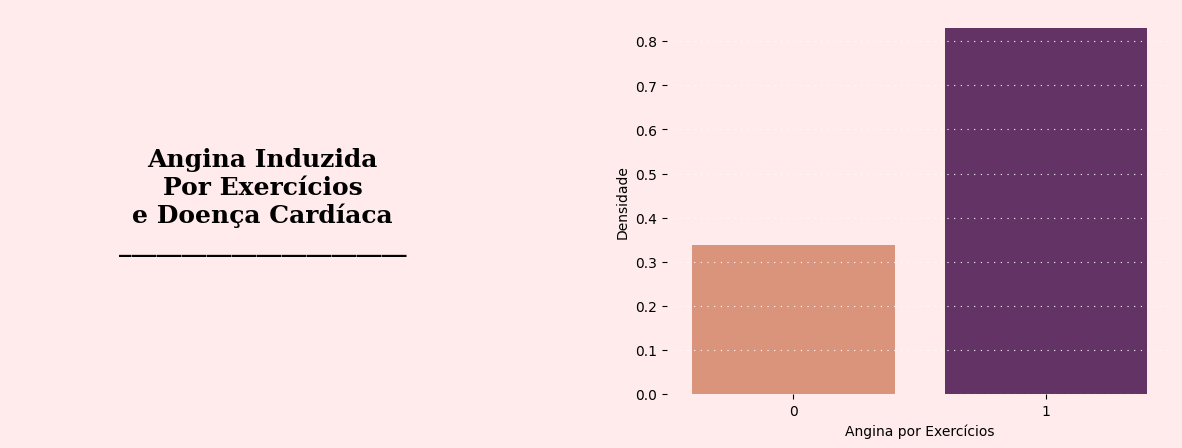

In [30]:
df['Angina por Exercícios'] = df['exercise angina'].cat.codes
prevalence_by_angina = df.groupby('Angina por Exercícios')['Doença Cardíaca'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
# Subplot 1: Título
axes[0].text(0.5, 0.5, "Angina Induzida\nPor Exercícios\ne Doença Cardíaca\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.barplot(ax=axes[1], data=df, x=prevalence_by_angina.index, y=prevalence_by_angina.values, palette=['#e98d6b','#6c2b6d'])
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Angina por Exercícios", ylabel="Densidade")

for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()


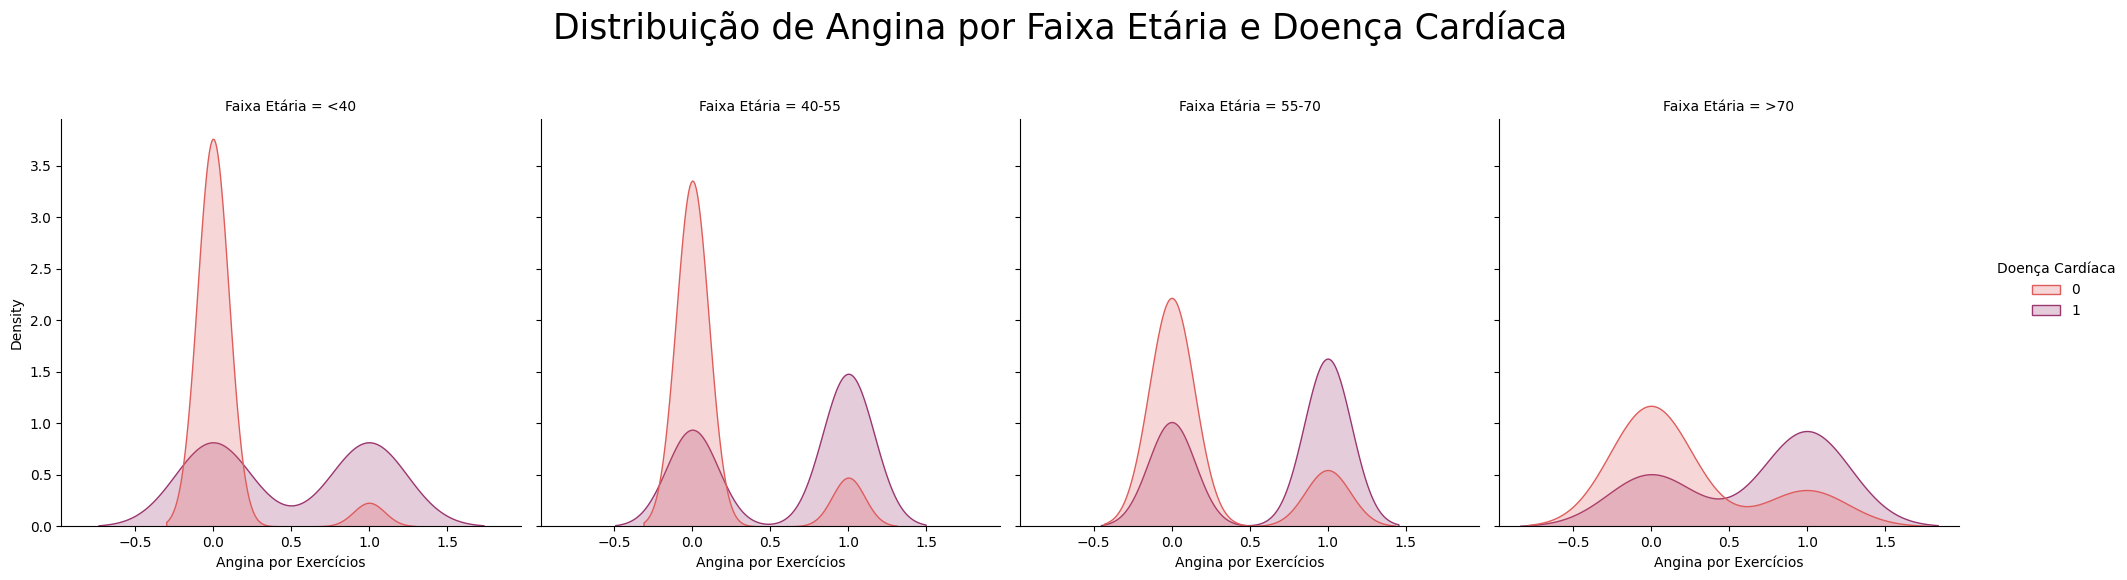

In [31]:

sns.displot(ax=axes, data=df, x='Angina por Exercícios', hue='Doença Cardíaca', col='Faixa Etária', palette=color_palette, kind='kde', fill=True, common_norm=False)
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Densidade", ylabel="Colesterol")
plt.suptitle('Distribuição de Angina por Faixa Etária e Doença Cardíaca', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

O gráfico demonstra claramente que a `angina induzida por exercício` é um fator de risco significativo para doença cardíaca.

In [32]:
prevalence_by_angina = df.groupby('Angina por Exercícios')['Doença Cardíaca'].mean()

prevalence_by_angina = (prevalence_by_angina * 100).round(2)

print("\nPrevalência de doença cardíaca por Angina induzida por exercício:\n")
print(prevalence_by_angina)


Prevalência de doença cardíaca por Angina induzida por exercício:

Angina por Exercícios
0    33.74
1    83.08
Name: Doença Cardíaca, dtype: float64


* Pacientes que apresentam `angina durante o exercício` têm uma prevalência de doença cardíaca de aproximadamente `83%`, enquanto aqueles que não apresentam angina têm uma prevalência muito menor, de cerca de `34%`. Essa diferença substancial indica uma forte associação entre a `angina induzida por exercício` e a presença de doença cardíaca, confirmando que este é um importante fator de risco a ser considerado.

<a id="dpst"></a>
### **Qual a influência da depressão do segmento ST (oldpeak) na probabilidade de doença cardíaca?**

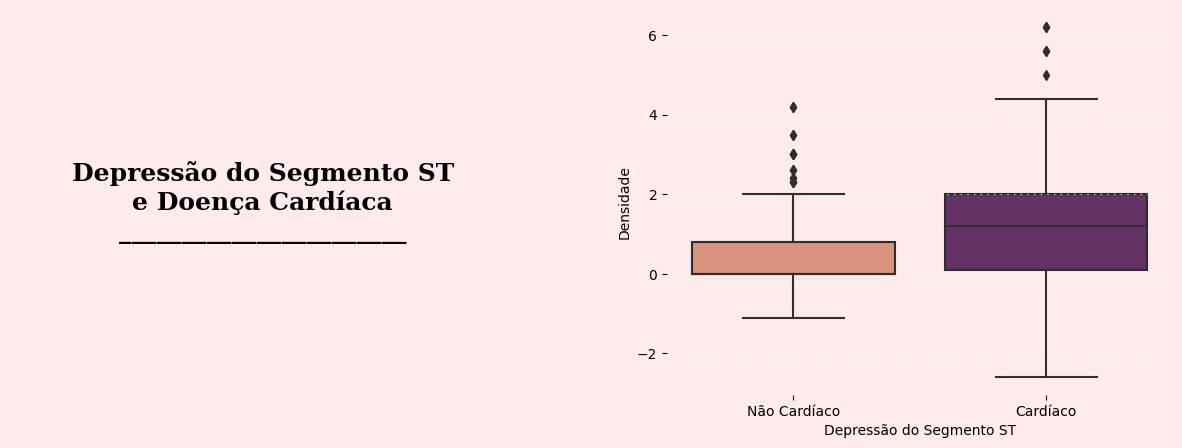

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
# Subplot 1: Título
axes[0].text(0.5, 0.5, "Depressão do Segmento ST\ne Doença Cardíaca\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.boxplot(ax=axes[1], data=df, x='target', y='oldpeak', palette=['#e98d6b','#6c2b6d'])
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Depressão do Segmento ST", ylabel="Densidade")

for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()


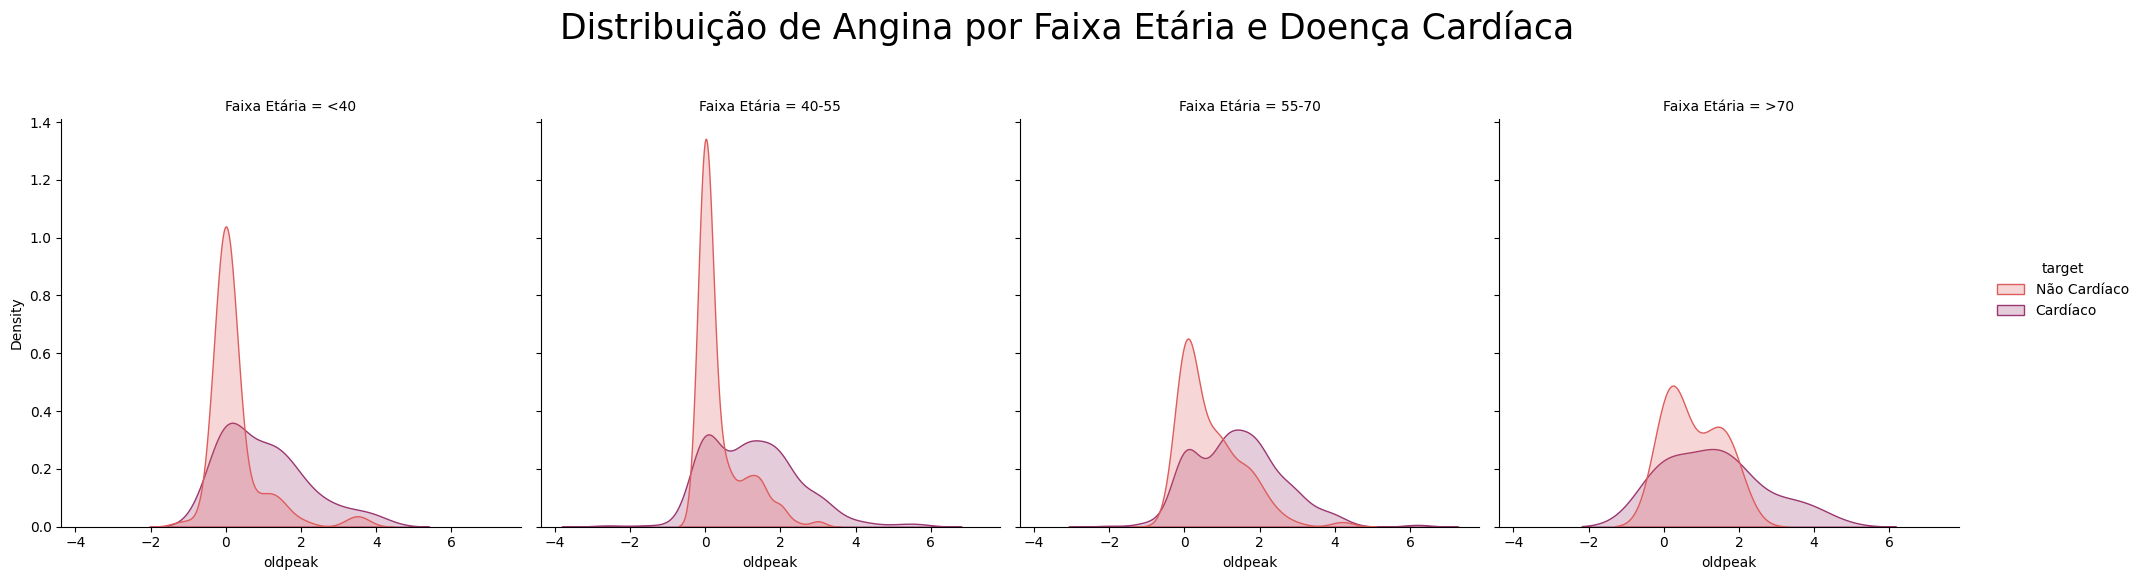

In [34]:

sns.displot(ax=axes, data=df, x='oldpeak', hue='target', col='Faixa Etária', palette=color_palette, kind='kde', fill=True, common_norm=False)
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Densidade", ylabel="Colesterol")
plt.suptitle('Distribuição de Angina por Faixa Etária e Doença Cardíaca', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

A análise da relação entre a `depressão do segmento ST` e a doença cardíaca revela uma correlação positiva de `0.398`, indicando que pacientes com doença cardíaca tendem a apresentar maior `depressão do segmento ST` em comparação com aqueles sem a doença.

O gráfico ilustra essa associação, mostrando que a `mediana` da `depressão do segmento ST` é mais alta no grupo com doença cardíaca, e a distribuição dos valores também é mais dispersa nesse grupo, com a presença de mais `outliers`.

* **Conclusão**: A `depressão do segmento ST` parece ser um fator de risco relevante para doença cardíaca, embora a correlação não seja extremamente forte, sugerindo a influência de outros fatores na manifestação da doença. A análise visual do boxplot reforça essa associação, mostrando uma clara diferença na distribuição da `depressão do segmento ST` entre os grupos com e sem doença cardíaca.

<a id="freqeidade"></a>
### **Qual a Relação entre Frequência Cardíaca e Idade**

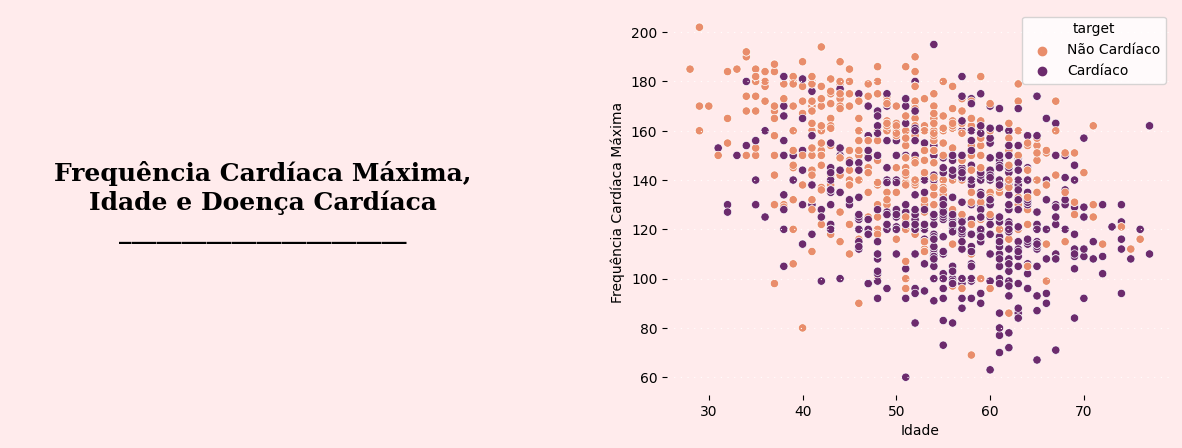

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.3, 'hspace': 0.15})

bg_color = "#ffebec"
color_palette = 'flare'
fig.set_facecolor(bg_color) 
axes[0].set_facecolor(bg_color) 
axes[1].set_facecolor(bg_color) 
# Subplot 1: Título
axes[0].text(0.5, 0.5, "Frequência Cardíaca Máxima,\nIdade e Doença Cardíaca\n_______________________", 
             ha='center', va='center', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].axis('off') 


sns.scatterplot(ax=axes[1], data=df, x='age', y='max heart rate', hue='target', palette=['#e98d6b','#6c2b6d'])
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Idade", ylabel="Frequência Cardíaca Máxima")

for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()

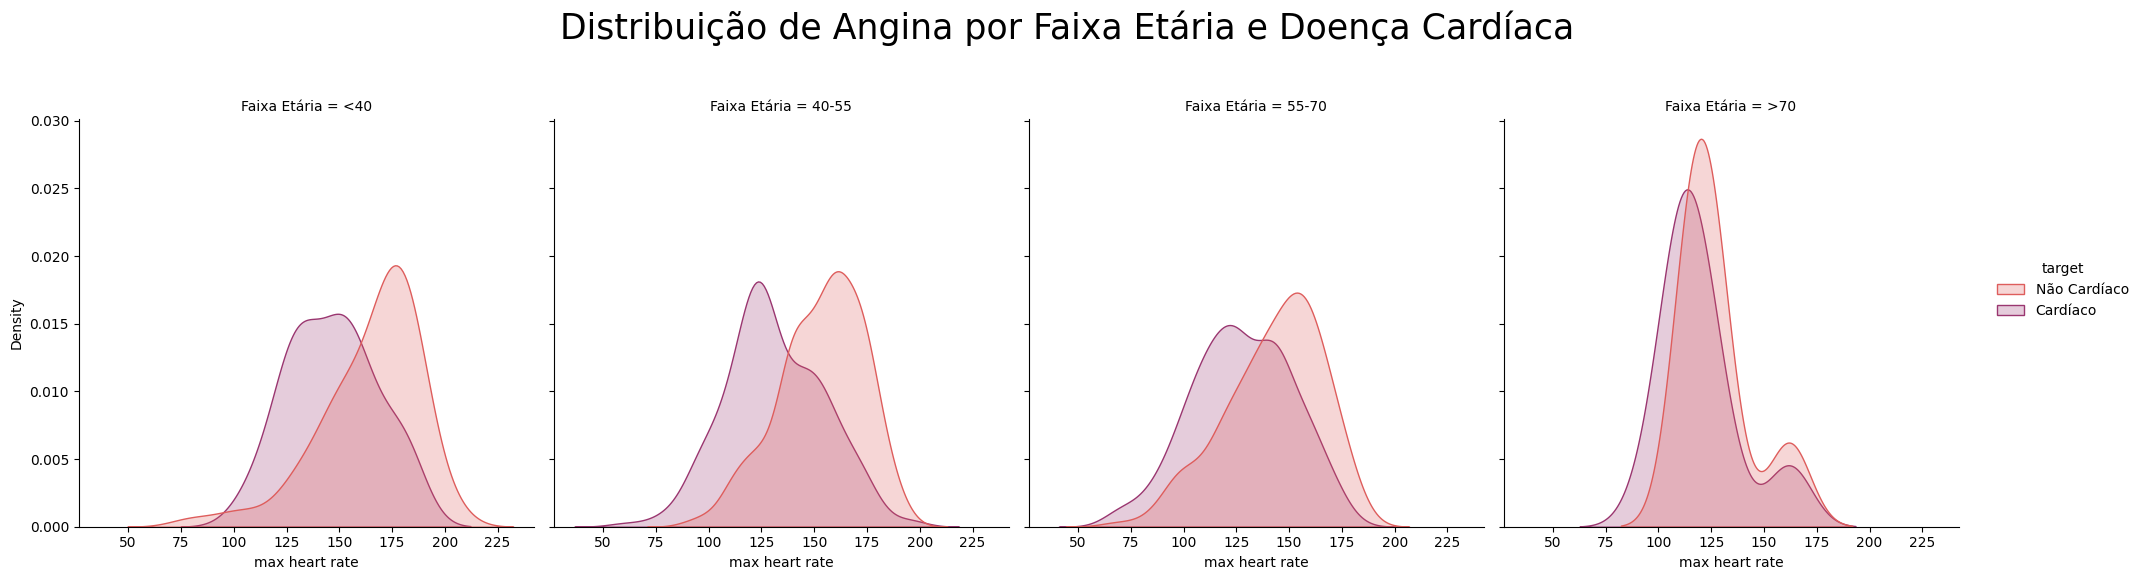

In [36]:
sns.displot(ax=axes, data=df, x='max heart rate', hue='target', col='Faixa Etária', palette=color_palette, kind='kde', fill=True, common_norm=False)
axes[1].grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
axes[1].set(xlabel="Densidade", ylabel="Colesterol")
plt.suptitle('Distribuição de Angina por Faixa Etária e Doença Cardíaca', y=1.15, fontsize=25)
for ax in axes:
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


plt.show()

O gráfico demonstra que a `frequência cardíaca máxima` está relacionada tanto com a `idade` quanto com a presença de doença cardíaca. Pacientes mais velhos e aqueles com doença cardíaca tendem a ter `frequências cardíacas máximas` mais baixas. No entanto, é importante lembrar que outros fatores também influenciam o risco de doença cardíaca, e a `frequência cardíaca máxima` deve ser interpretada em conjunto com outras informações clínicas e exames complementares.

<a id="recap02"></a>
### **Recapitulação**

A Parte 2 se aprofundou na relação entre as variáveis e a presença de doença cardíaca. A idade, apesar de importante, mostrou que outros fatores também influenciam. O sexo masculino confirmou-se como um fator de risco, principalmente entre 40 e 55 anos. A dor no peito assintomática foi a mais comum em pacientes com a doença, enquanto a angina se mostrou um forte indicativo de risco. O colesterol, apesar de relevante, não apresentou uma relação linear direta com a doença, e a depressão do segmento ST e a frequência cardíaca máxima mostraram-se importantes na avaliação do risco. Em suma, a Parte 2 revelou a complexidade da doença cardíaca e a necessidade de considerar múltiplos fatores em sua análise.

---

<a id="parte03"></a>
# 3. **Insights e Conclusões.**

A análise exploratória dos dados revelou diversos insights sobre os fatores de risco para doença cardíaca neste conjunto de dados.

<a id="insights"></a>

1. **Qual a distribuição de idade dos pacientes?**

A maioria dos pacientes se encontra na faixa etária entre `40 e 60 anos`, com uma leve tendência de assimetria à direita, indicando uma maior concentração de pacientes com idades mais elevadas.

2. **Existe diferença na prevalência de doença cardíaca entre homens e mulheres?**

Sim, existe uma diferença significativa. A prevalência é consideravelmente maior em homens (aproximadamente `0.62`) em comparação com mulheres (aproximadamente `0.25`).

3. **Qual o tipo de dor no peito mais frequente em pacientes com doença cardíaca?**

O tipo de dor no peito mais frequente em pacientes com doença cardíaca é `assintomático`.

4. **Qual a relação entre o nível de colesterol e a presença de doença cardíaca?**

A relação entre `colesterol` e `doença cardíaca` não é linear e parece ser influenciada por outros fatores, como a `idade`.
A prevalência de doença cardíaca não aumenta linearmente com o aumento do `colesterol`.
Em algumas faixas etárias, a `média` de `colesterol` é ligeiramente maior em pacientes sem doença cardíaca
O `colesterol` pode não ser o fator de risco mais determinante neste conjunto de dados
Outros fatores de risco, como `idade`, `histórico familiar`, `estilo de vida` e outras condições médicas, provavelmente desempenham um papel crucial.

5. **A angina induzida por exercício é um fator de risco para doença cardíaca?**

Sim, a `angina induzida por exercício` é um fator de risco significativo. Pacientes que `apresentam angina` durante o exercício têm uma prevalência de doença cardíaca muito maior (aproximadamente `83%`) do que aqueles que não `apresentam angina` (aproximadamente `34%`).

6. **Qual a influência da depressão do segmento ST (oldpeak) na probabilidade de doença cardíaca?**
A correlação entre `Depressão do segmento ST` e `Doença cardíaca` é: `0.398`.

Pacientes com doença cardíaca tendem a apresentar maior `depressão do segmento ST`.
A `depressão do segmento ST` é um fator de risco relevante, embora a correlação não seja extremamente forte.

7. **Quais são os principais fatores de risco para doença cardíaca neste dataset?**

### **Os principais fatores de risco são:**

- `Inclinação do segmento ST`
- `Angina induzida por exercício`
- `Tipo de dor no peito`
- `Frequência cardíaca máxima`
- `Depressão do segmento ST`

<a id="conclusao"></a>
## **Conclusão**


* **Variáveis Categóricas:**

O `sexo masculino`, a presença de `angina induzida por exercício`, `anormalidades no ECG em repouso` e a `inclinação do segmento ST para baixo` foram associados a uma maior prevalência de doença cardíaca
O tipo de dor no peito '`assintomático`' e o `açúcar no sangue em jejum elevado` também se mostraram como fatores de risco relevantes.

* **Variáveis Quantitativas:**

A `idade` e a `depressão do segmento ST` apresentaram correlações positivas com a doença cardíaca.
A `frequência cardíaca máxima` mostrou uma correlação negativa, indicando que valores mais baixos estão associados a um maior risco.
O `colesterol`, apesar de ser um fator de risco conhecido, não apresentou uma relação linear forte com a doença cardíaca neste conjunto de dados.

* **Correlações:**

A análise de correlação confirmou a importância da `inclinação do segmento ST`, `angina induzida por exercício`, `tipo de dor no peito`, `frequência cardíaca máxima` e `depressão do segmento ST` como preditores de doença cardíaca
Em geral, a análise exploratória forneceu um panorama abrangente dos fatores de risco presentes neste conjunto de dados, destacando a importância de considerar múltiplas variáveis na avaliação do risco individual. 

--- 

A análise insights valiosos sobre os fatores de risco associados a doenças cardíacas. O estudo confirmou a influência de fatores de risco bem estabelecidos, como sexo masculino, idade avançada e histórico de angina. Além disso, a análise destacou a importância de indicadores como a depressão do segmento ST e a inclinação descendente do segmento ST, que podem auxiliar na identificação precoce de pacientes em risco.

O colesterol, apesar de sua reconhecida relevância como fator de risco, não demonstrou uma associação linear direta com a doença cardíaca neste conjunto de dados específico. Essa observação sugere a necessidade de considerar a interação complexa entre múltiplos fatores na avaliação do risco cardiovascular, incluindo histórico familiar, estilo de vida e outras condições médicas.

Em suma, este projeto forneceu um panorama abrangente dos fatores de risco para doenças cardíacas, reforçando a importância da prevenção e do diagnóstico precoce. 

<a id="referências"></a>
# Referências
- [Python Data Analysis Project For Beginners on Restaurant Data with Pandas and Seaborn Library](https://www.youtube.com/watch?v=nrLLw5nL_ck)
- [Data Analysis on Tips Dataset in 2 hours | Shambhavi Gupta | Fun with data science](https://www.youtube.com/watch?v=sQBrcK6MIa0&t=6026s)
- [Seaborn Tutorial in Python | Machine Learning Course](https://www.youtube.com/watch?v=FUzM6Fy1oIw&t=812s)
- [Seaborn Python Tutorial | Complete Seaborn Crash Course | Data Visualization in Seaborn | Kgp Talkie](https://www.youtube.com/watch?v=GcXcSZ0gQps&t=456s)
- [Seaborn Python Tutorial - Data Visualization Seaborn](https://www.youtube.com/watch?v=yqvPEh5Suw0)
- [Introduction to Box and Boxen Plots | Python Data Visualization Guide (Part 3)](https://www.youtube.com/watch?v=-6cSnHmRkiw)
- [DS - ML Tutorial 42. Data Visualization - Advanced Plotting with Seaborn Librar](https://www.youtube.com/watch?v=c1iWkbURX4w)
- [Data Visualization on Tips Dataset: DAY#7 of Machine Learning course from Novice to Pro](https://www.youtube.com/watch?v=Pm-fh_rkECk)
- [Seaborn Pairplot | Seaborn Jointplot | Visualization | Python | Seaborn | SuMyPyLab](https://www.youtube.com/watch?v=3Uwq0TB-AeM&t=1s)
- [Data Visualization using Python Seaborn | Data Science | Seaborn | Visualisation | SuMyPyLab](https://www.youtube.com/watch?v=WJ2ctnxvpps)
- [Explorando o Dataset tips do Seaborn no Python (CPyJN)](https://www.youtube.com/watch?v=mfFL0_sNVy0&t=66s)
- [Python Data Analysis Case Study | Analyzing Restaurant Tips Data in Python | [Pandas] [Seaborn]](https://www.youtube.com/watch?v=fJ82678KNCk&t=1555s)
- [Seaborn Tutorial : Seaborn Full Course](https://www.youtube.com/watch?v=6GUZXDef2U0&t)
- [Python for Data Science | Data Visualization Using Seaborn | Tips Dataset](https://www.youtube.com/watch?v=YWYKY1m2F6s)
- [seaborn tips miniProject](https://www.youtube.com/watch?v=JEj5IOx-KCo)
- [python data analysis tips sns jointplot how to change subplots in seaborn jointplot](https://www.youtube.com/watch?v=B00ZUuqxA0U&t)
- [Data Analysis Project Walkthrough - Create visualizations using Numpy, Pandas, Matplotlib](https://www.youtube.com/watch?v=BJF6l2SXFoI&t)
- [Python Seaborn Tutorial | Python Seaborn Plots | Python Seaborn Tutorial For Beginners | Simplilearn](https://www.youtube.com/watch?v=eG663qYKjVw&t)
- [Seaborn|Visualization in Python|Complete Seaborn Tutorial|Seaborn in less than 30 minutes|Learnerea](https://www.youtube.com/watch?v=cSZmd-kF1Yk&t)
- [Gráficos com Python usando Seabor](https://www.youtube.com/watch?v=N-S3cBEc96k&t)
- [Seaborn Data Visualization with Python | Project Tips Data set](https://www.youtube.com/watch?v=7Dsn0xas2mg)
- [Matplotlib Tutorial : Matplotlib Full Course](https://www.youtube.com/watch?v=wB9C0Mz9gSo&t)
- [Statistics Tutorial with Python](https://www.youtube.com/watch?v=YCPYNXtwKAc)
- [Wikipedia: Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [Tidy Data by Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf)
- [Wikipedia: Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)
- [hacker earth blog post on regression analysis](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/)
- [drawing from data](https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib)
- [tips dataset on Michael Waskon GitHub](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.)
- [Project Jupyter](https://jupyter.org/)
- [seaborn.pydata.org](https://seaborn.pydata.org/)
- [seaborn](https://seaborn.pydata.org/introduction.html#introduction)
- [GitHub guides - Mastering Markdown](https://guides.github.com/features/mastering-markdown/)
- [Jupyter Notebook Tips, Tricks, and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)


- [Informações Sobre este Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease)